In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [59]:
try:
    df = pd.read_csv("M25_DA_A1_Dataset1.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("File not found.")
    df = None

if df is not None:
    print("--- Initial Data Info ---")
    if 'fnlwgt' in df.columns:
        df.drop(columns=['fnlwgt'], inplace=True)
        print("Dropped 'fnlwgt' column as it is not useful.")
    df.info()
    print("\n--- First 5 Rows ---")
    print(df.head())
    print(f"\nInitial dataset shape: {df.shape}")

Dataset loaded successfully.
--- Initial Data Info ---
Dropped 'fnlwgt' column as it is not useful.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48843 entries, 0 to 48842
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             48843 non-null  object 
 1   Workclass       46043 non-null  object 
 2   Education       48842 non-null  object 
 3   Education_Num   48842 non-null  float64
 4   Martial_Status  48842 non-null  object 
 5   Occupation      46033 non-null  object 
 6   Relationship    48842 non-null  object 
 7   Race            48842 non-null  object 
 8   Sex             48842 non-null  object 
 9   Capital_Gain    48842 non-null  float64
 10  Capital_Loss    48842 non-null  float64
 11  Hours_per_week  48842 non-null  float64
 12  Country         47985 non-null  object 
 13  Target          48842 non-null  object 
dtypes: float64(4), object(10)
memory usage: 5.2+ MB

--- First 5 Rows 

1. The `Age` column is listed as an `object` instead of a number.
2. The `RangeIndex` has 48843 entries, but some columns have 48842 non-null values, one row is almost empty and should be removed.
3. `Workclass`, `Occupation`, and `Country` have missing values.

In [60]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
print("Converted 'Age' column to numeric.")

initial_rows = len(df)
df.dropna(subset=['Age'], inplace=True)
rows_dropped = initial_rows - len(df)
print(f"Dropped {rows_dropped} rows due to NaN values in 'Age'.")

for col in [
    'Age', 'Education_Num', 'Capital_Gain',
    'Capital_Loss', 'Hours_per_week'
]:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype(int)
    print(f"Converted '{col}' column to integer type.")

print("\n--- Data Info After Type Correction ---")
df.info()

Converted 'Age' column to numeric.
Dropped 1 rows due to NaN values in 'Age'.
Converted 'Age' column to integer type.
Converted 'Education_Num' column to integer type.
Converted 'Capital_Gain' column to integer type.
Converted 'Capital_Loss' column to integer type.
Converted 'Hours_per_week' column to integer type.

--- Data Info After Type Correction ---
<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 48842
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       46043 non-null  object
 2   Education       48842 non-null  object
 3   Education_Num   48842 non-null  int64 
 4   Martial_Status  48842 non-null  object
 5   Occupation      46033 non-null  object
 6   Relationship    48842 non-null  object
 7   Race            48842 non-null  object
 8   Sex             48842 non-null  object
 9   Capital_Gain    48842 non-null  int64 
 10  Capit

- When we dropped a row, pandas changed the index from `RangeIndex` which is highly memory efficient to a standard `Index` which stores all 48842 row numbers, thats why the memory usage increased.
- There are 10 more cases of missing `Occupation` values where `Workclass` is present.
- Next step is fix data inconsistencies like the `Target` column and trim whitespaces from all other text-based columns.

In [61]:

print("--- Cleaning 'Target' Column ---")
if 'Target' in df.columns:
    print("Unique values before cleaning:", df['Target'].unique())

    df['Target'] = df['Target'].str.strip().str.rstrip('.')

    print("Unique values after cleaning:", df['Target'].unique())

print("\n--- Stripping Whitespace from All Object Columns ---")
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()
print("Whitespace stripped from all object columns.")

--- Cleaning 'Target' Column ---
Unique values before cleaning: [' <=50K' ' >50K' ' <=50K.' ' >50K.']
Unique values after cleaning: ['<=50K' '>50K']

--- Stripping Whitespace from All Object Columns ---
Whitespace stripped from all object columns.


- Next step is to handle the missing values in `Workclass`, `Occupation`, and `Country` columns.

--- Visualizing Missing Value Correlations ---


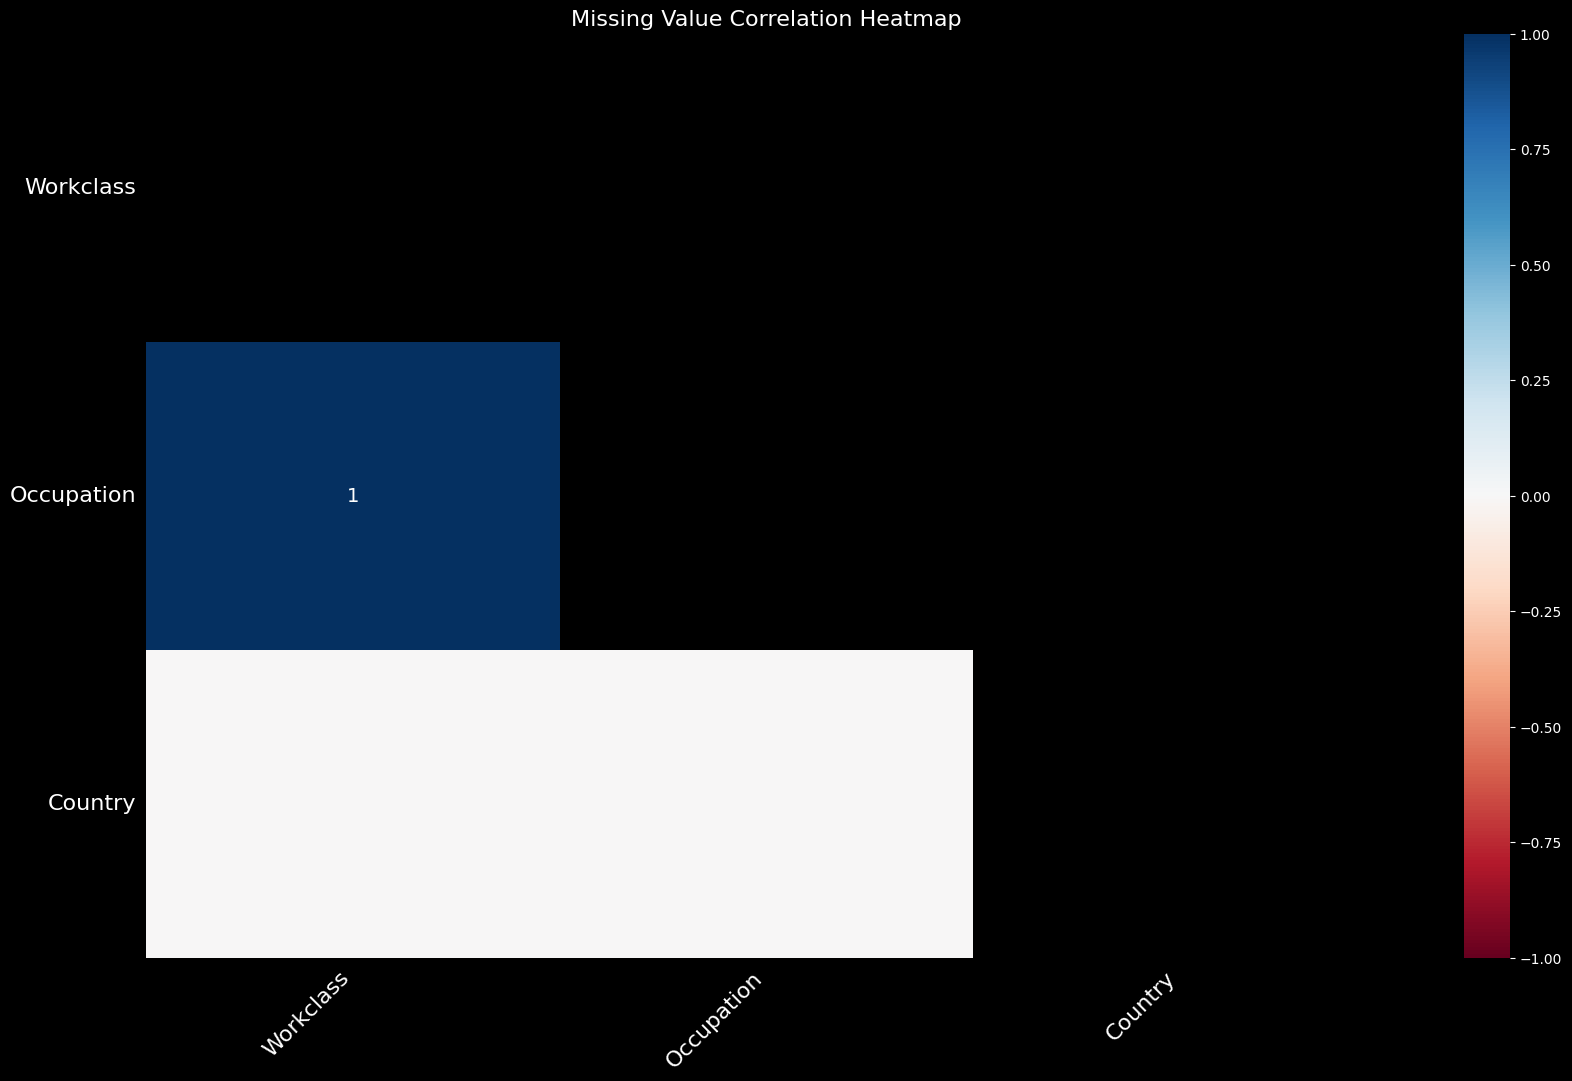


--- Analyzing Distributions for Missing Data ---


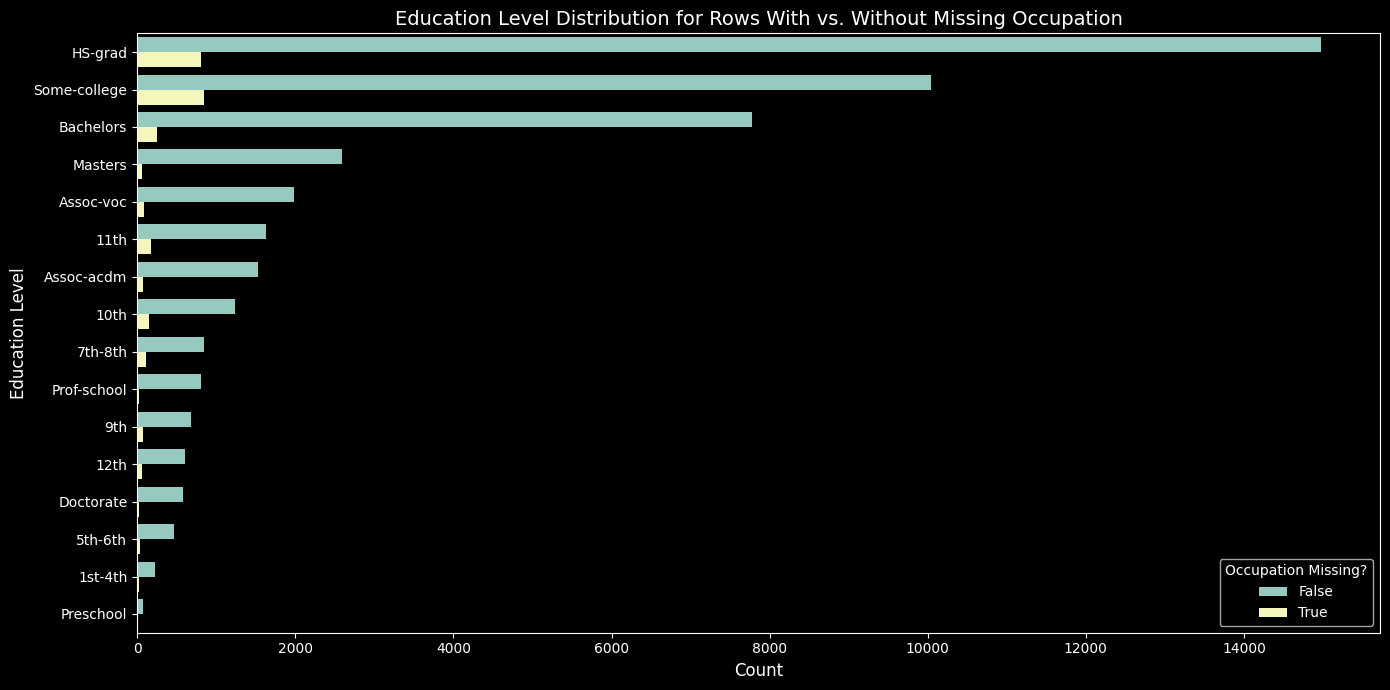

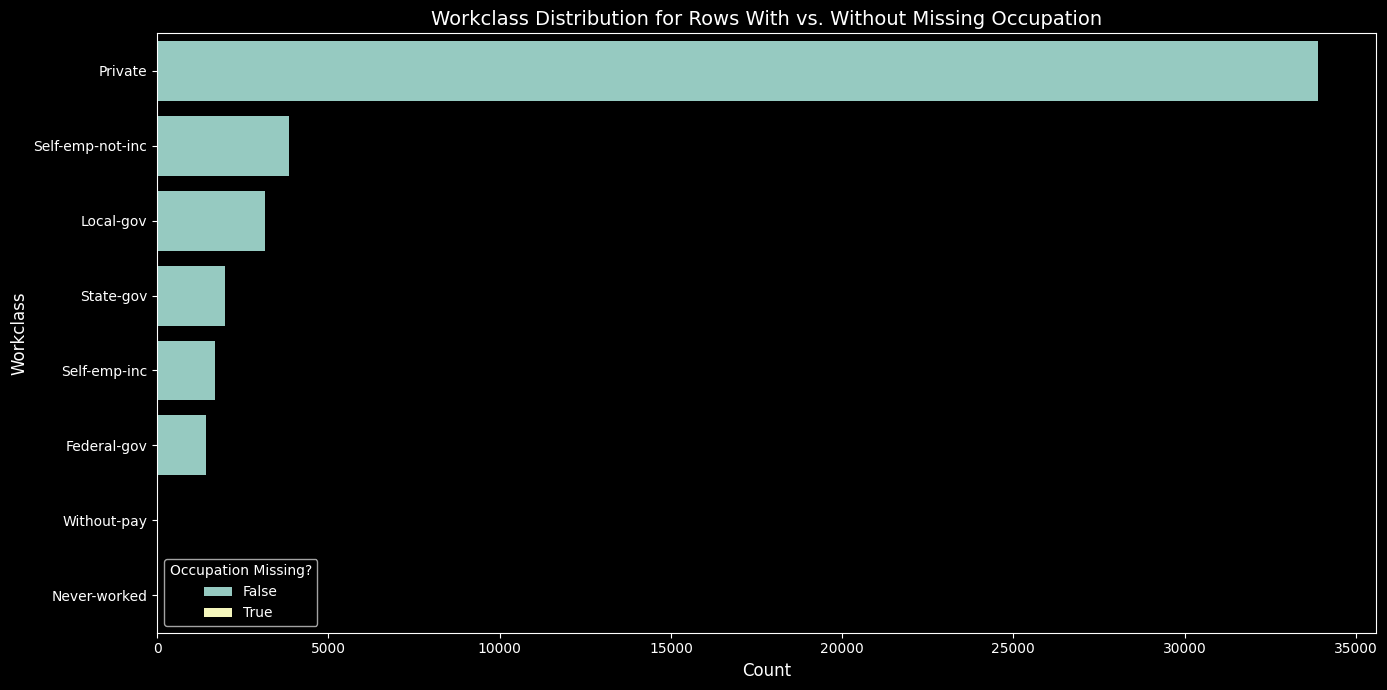

In [62]:
print("--- Visualizing Missing Value Correlations ---")

# 1. Missing Value Heatmap
# This shows the correlation of missingness between columns.
# A value of 1 means if a value is missing in one column, it's also missing in the other.
# A value of -1 means if a value is present in one, it's missing in the other.
msno.heatmap(df)
plt.title('Missing Value Correlation Heatmap', fontsize=16)
plt.show()

print("\n--- Analyzing Distributions for Missing Data ---")

df_missing_analysis = df.copy()
df_missing_analysis['Occupation_is_missing'] = df_missing_analysis['Occupation'].isnull()
df_missing_analysis['Workclass_is_missing'] = df_missing_analysis['Workclass'].isnull()

plt.figure(figsize=(14, 7))
sns.countplot(data=df_missing_analysis, y='Education', hue='Occupation_is_missing', order=df['Education'].value_counts().index)
plt.title("Education Level Distribution for Rows With vs. Without Missing Occupation", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Education Level", fontsize=12)
plt.legend(title='Occupation Missing?')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.countplot(data=df_missing_analysis, y='Workclass', hue='Occupation_is_missing', order=df['Workclass'].value_counts().index)
plt.title("Workclass Distribution for Rows With vs. Without Missing Occupation", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Workclass", fontsize=12)
plt.legend(title='Occupation Missing?')
plt.tight_layout()
plt.show()

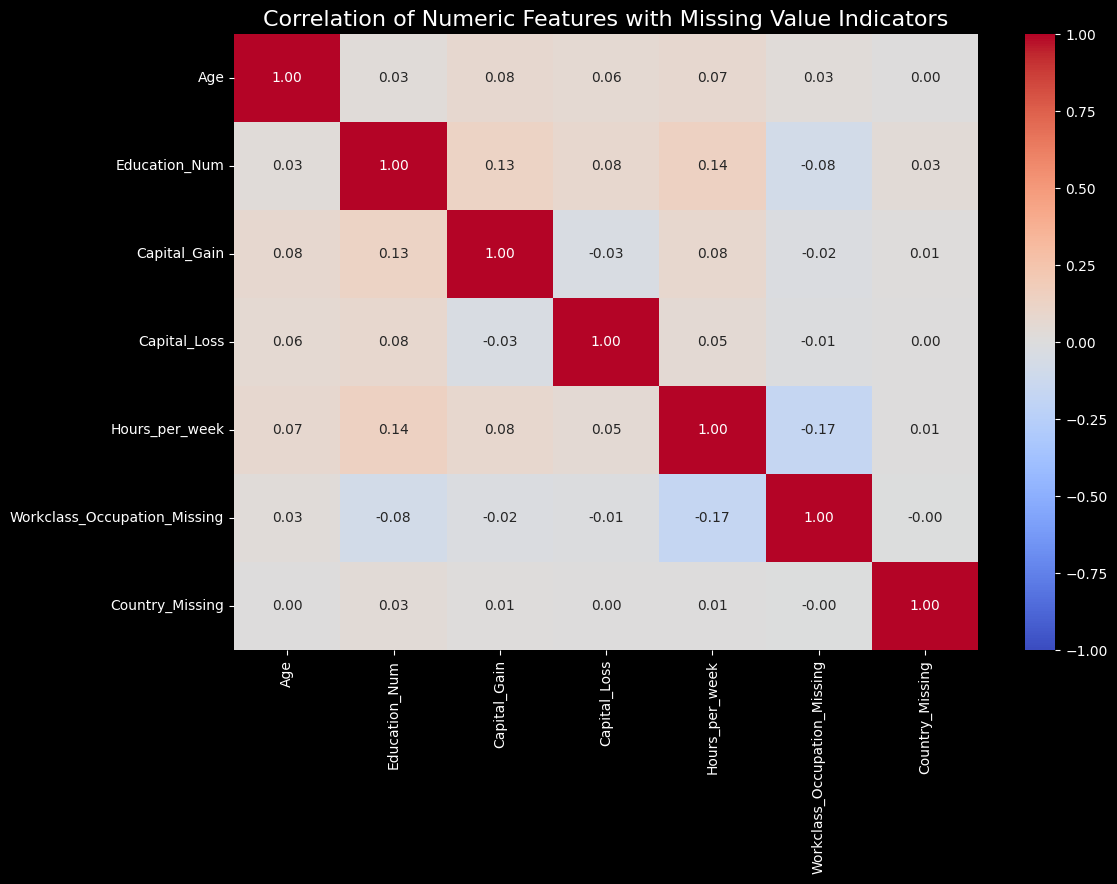

In [63]:
df_corr_analysis = df.copy()

# Create binary flags for missing values
df_corr_analysis['Workclass_Occupation_Missing'] = df_corr_analysis['Workclass'].isnull(
).astype(int)
df_corr_analysis['Country_Missing'] = df_corr_analysis['Country'].isnull(
).astype(int)

numeric_cols_with_flags = [
    'Age', 'Education_Num', 'Capital_Gain', 'Capital_Loss',
    'Hours_per_week', 'Workclass_Occupation_Missing', 'Country_Missing'
]
df_numeric_corr = df_corr_analysis[numeric_cols_with_flags]

corr_matrix = df_numeric_corr.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation of Numeric Features with Missing Value Indicators', fontsize=16)
plt.show()

- **Workclass and Occupation are missing together:** The missing value correlation heatmap shows a perfect correlation of 1 between `Workclass` and `Occupation`, indicating that when one is missing, the other is also likely to be missing. This means that, when `Workclass` is missing, `Occupation` is always missing. There are also 10 additional cases where `Occupation` is missing, but `Workclass` is present.
- **The group with missing Workclass/Occupation is fundamentally different from the rest of the dataset:** The education level distribution plot shows a different pattern of education for rows where Occupation is missing (yellow) versus where it is not (blue). Also the correlation of numeric features shows a negative correlation between `Workclass_Occupation_Missing` and `Hours_per_week`, meaning people in this group work fewer hours.
- **Missingness in Country column is independent:** `Country_Missing` has close to 0 correlation with all other features and can be safely replaced by mode.

In [64]:
print("--- Handling Missing Values ---")

country_mode = df['Country'].mode()[0]

fill_values = {
    'Workclass': 'Unknown',
    'Occupation': 'Unknown',
    'Country': country_mode
}

df.fillna(value=fill_values, inplace=True)

print("Filled missing 'Workclass' and 'Occupation' with 'Unknown'.")
print(f"Filled missing 'Country' with mode: '{country_mode}'.")

print("\n--- Verifying All Missing Values are Handled ---")
df.info()

--- Handling Missing Values ---
Filled missing 'Workclass' and 'Occupation' with 'Unknown'.
Filled missing 'Country' with mode: 'United-States'.

--- Verifying All Missing Values are Handled ---
<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 48842
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             48842 non-null  int64 
 1   Workclass       48842 non-null  object
 2   Education       48842 non-null  object
 3   Education_Num   48842 non-null  int64 
 4   Martial_Status  48842 non-null  object
 5   Occupation      48842 non-null  object
 6   Relationship    48842 non-null  object
 7   Race            48842 non-null  object
 8   Sex             48842 non-null  object
 9   Capital_Gain    48842 non-null  int64 
 10  Capital_Loss    48842 non-null  int64 
 11  Hours_per_week  48842 non-null  int64 
 12  Country         48842 non-null  object
 13  Target          48842 non-null  obje

In [65]:
print("\n--- Saving the cleaned dataset to a new CSV file ---")
output_filename = 'cleaned_dataset1.csv'
df.to_csv(output_filename, index=False)

print(f"Dataset successfully saved as '{output_filename}' in your current directory.")


--- Saving the cleaned dataset to a new CSV file ---
Dataset successfully saved as 'cleaned_dataset1.csv' in your current directory.


# Outlier Detection & EDA

- The extreme outliers in `Capital_Gain` and `Capital_Loss` are compressing the visualizations and hiding underlying patterns.
- We will not remove the outliers but transform the data for visualization.

Starting Structured EDA...

--- PART 1: UNIVARIATE ANALYSIS ---

Analyzing Numerical Feature Distributions...


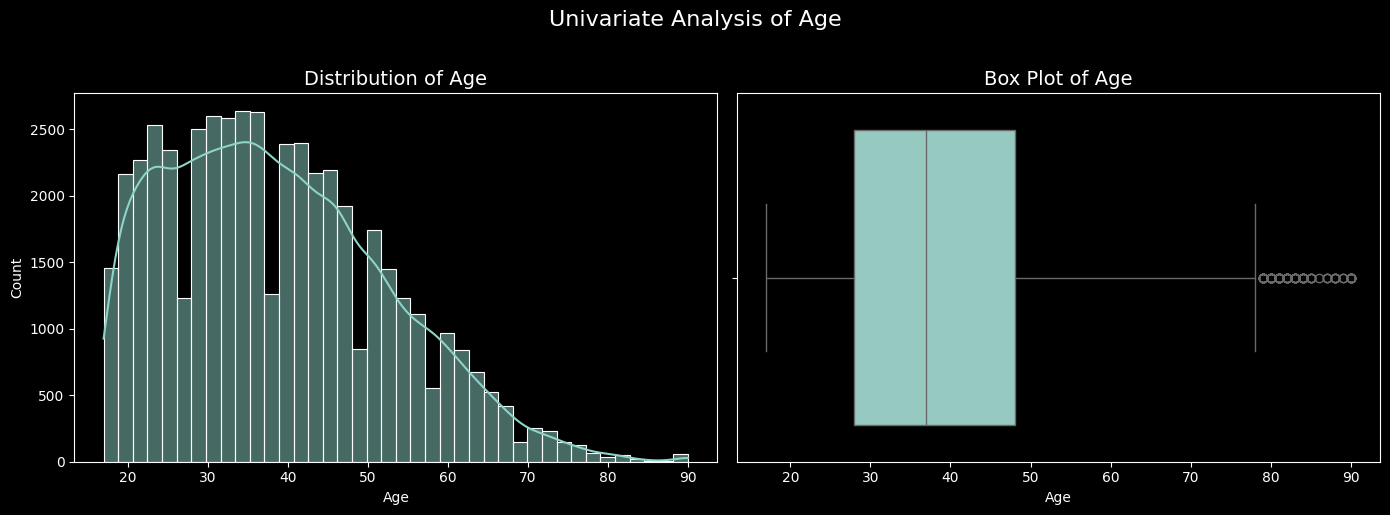

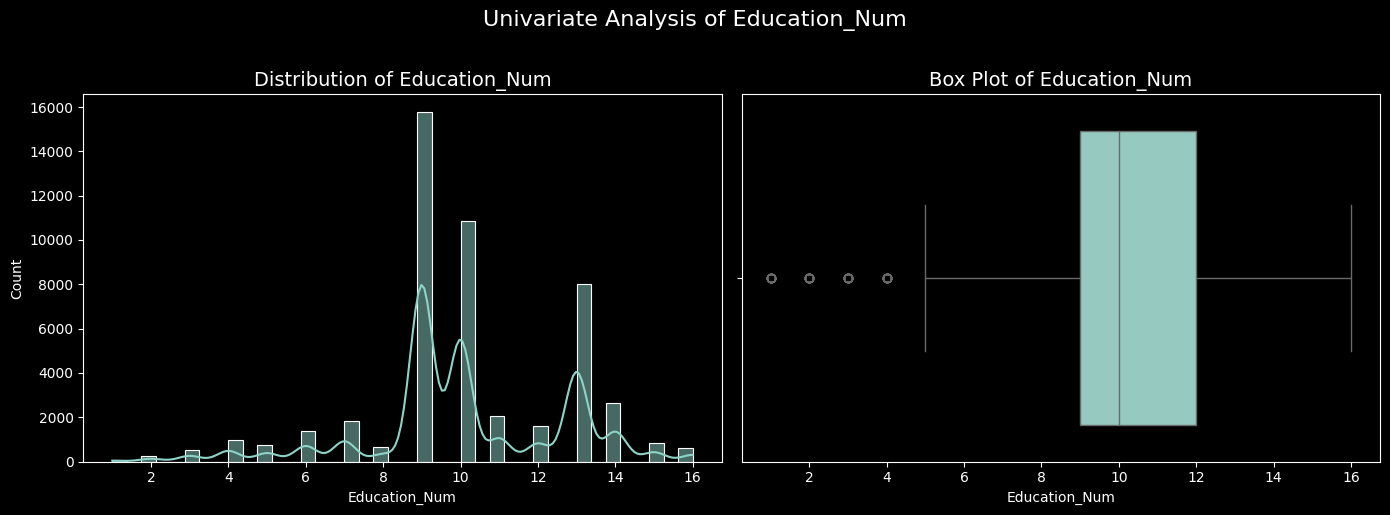

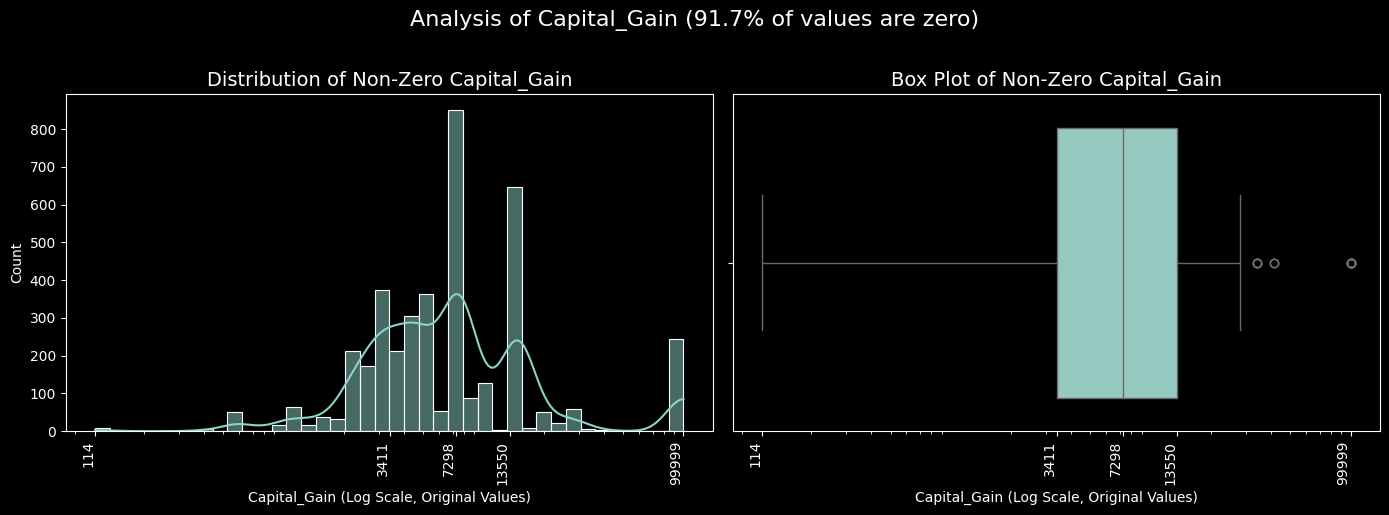

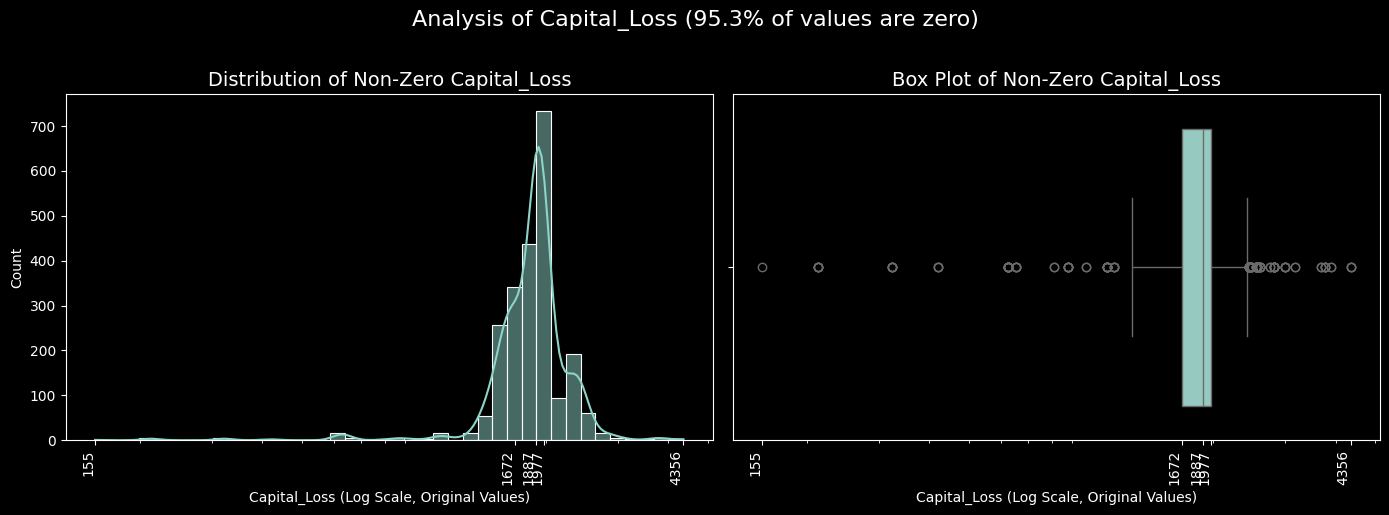

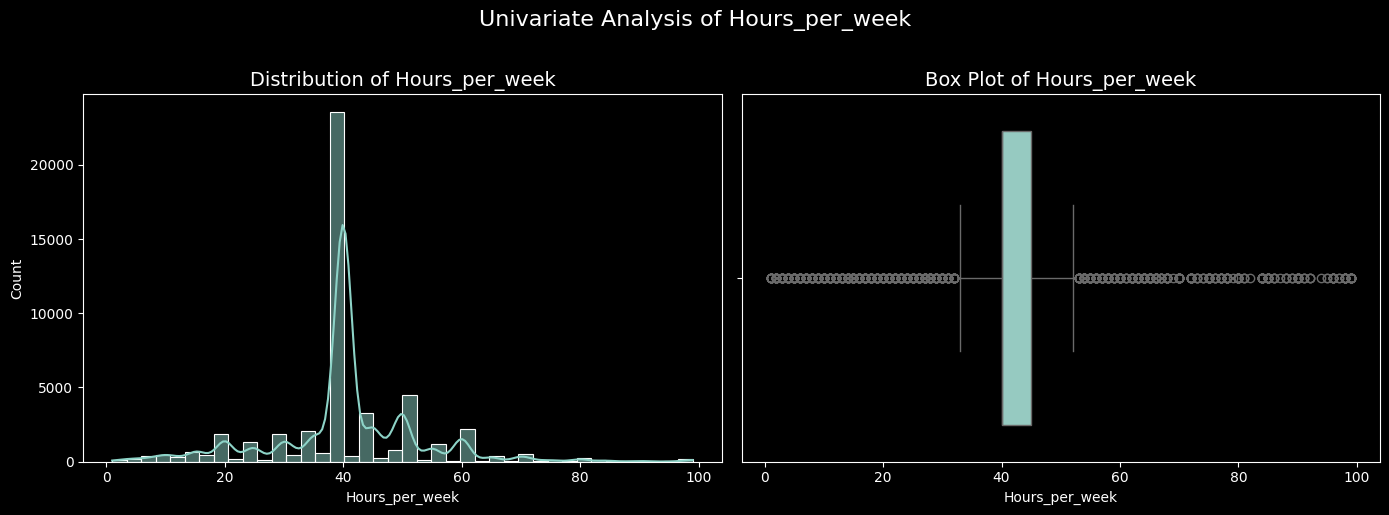


Analyzing Categorical Feature Distributions...


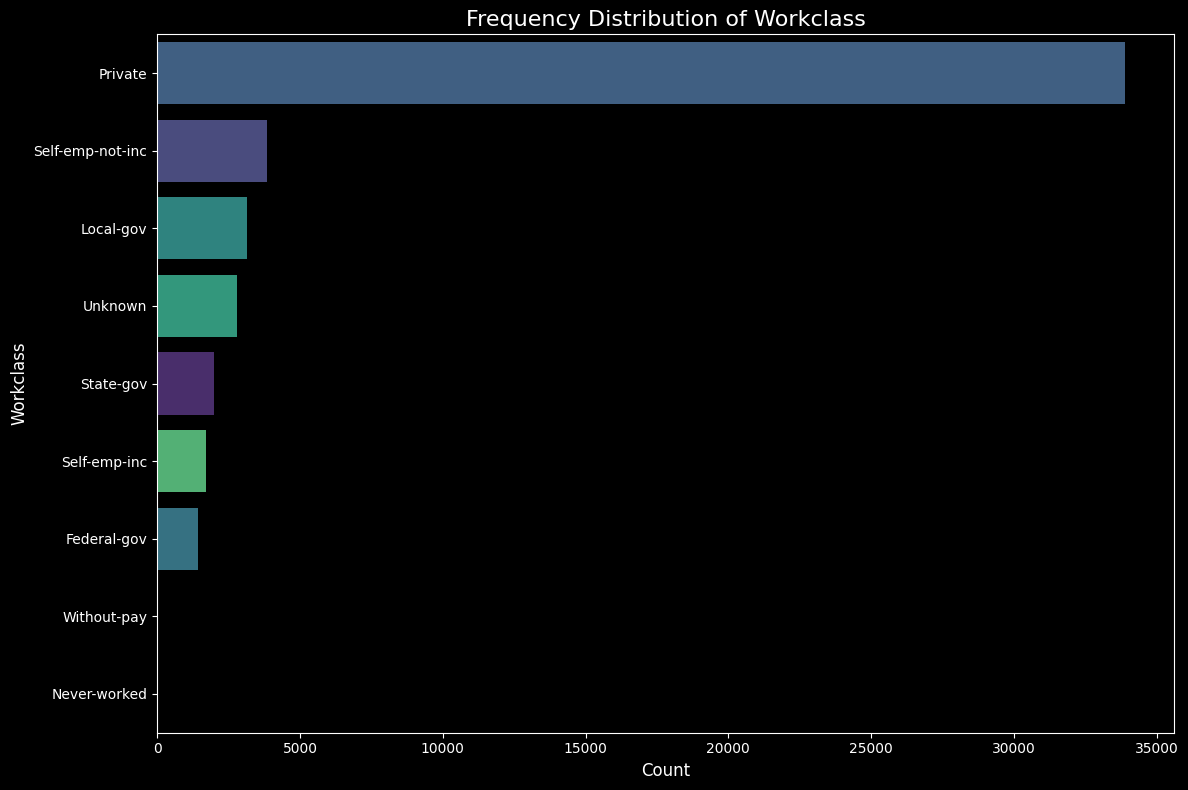

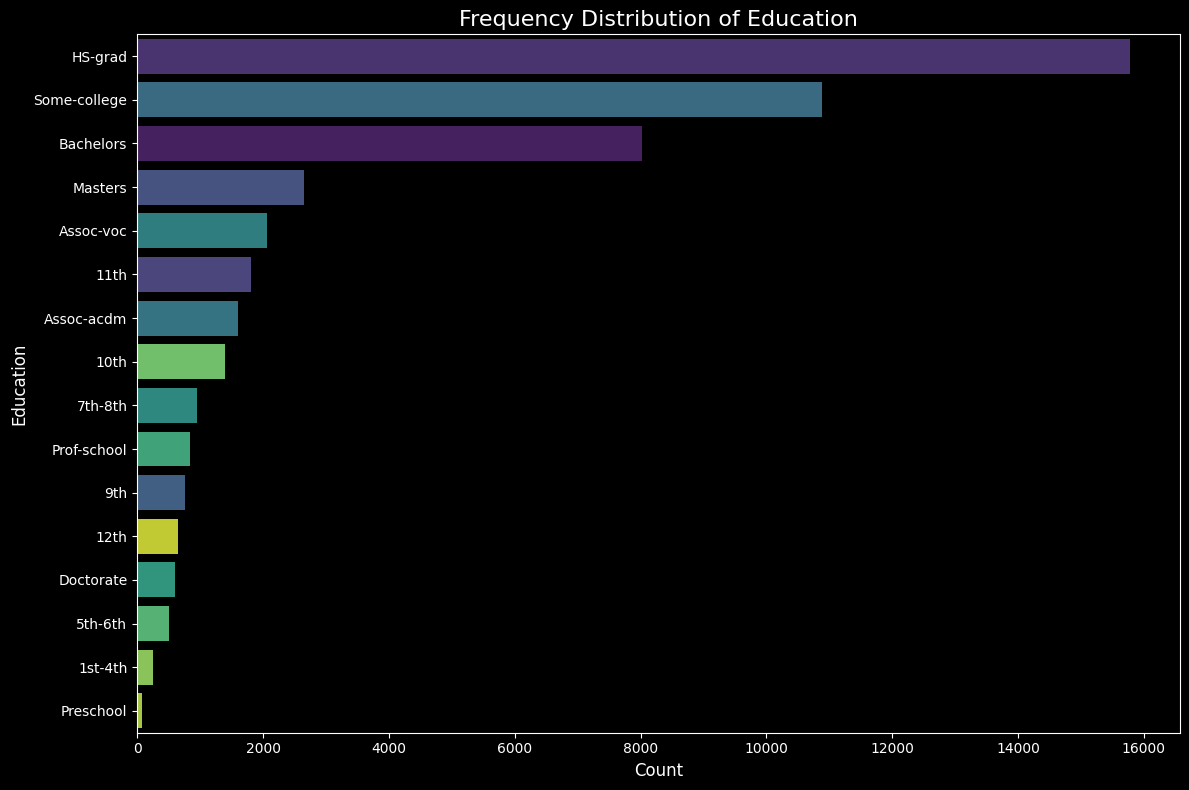

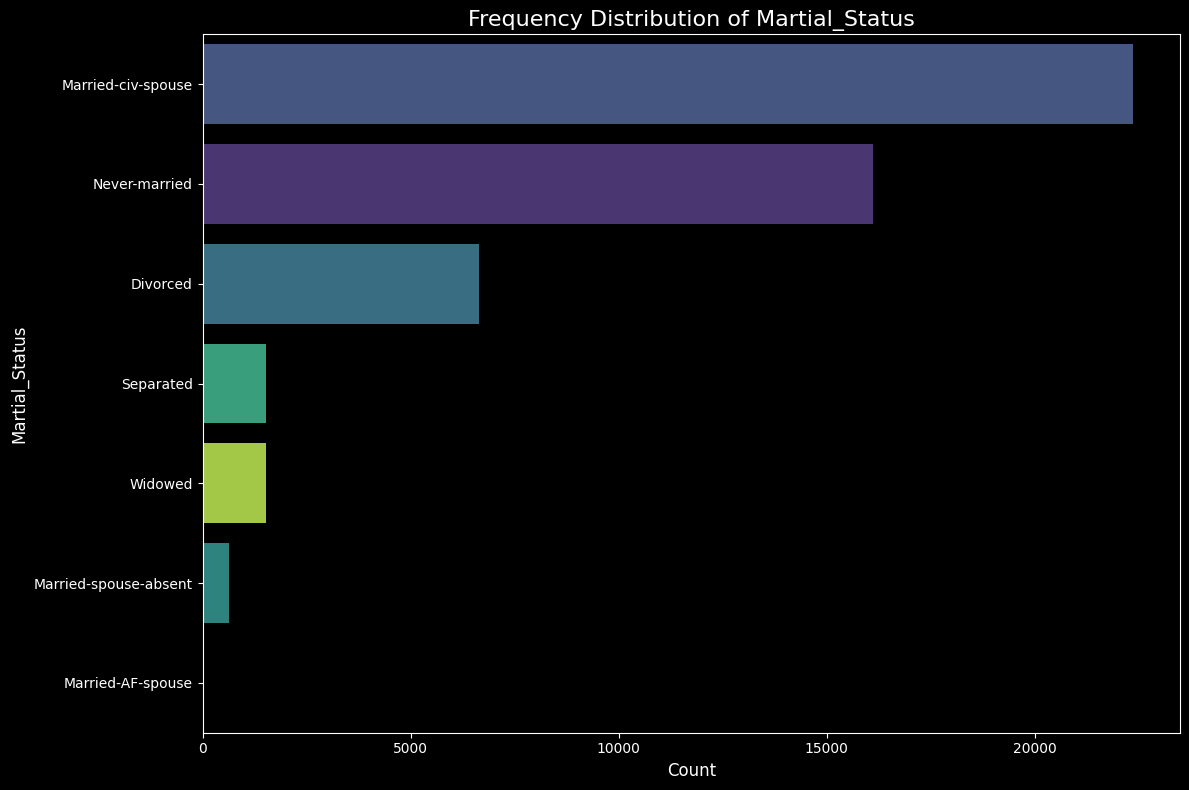

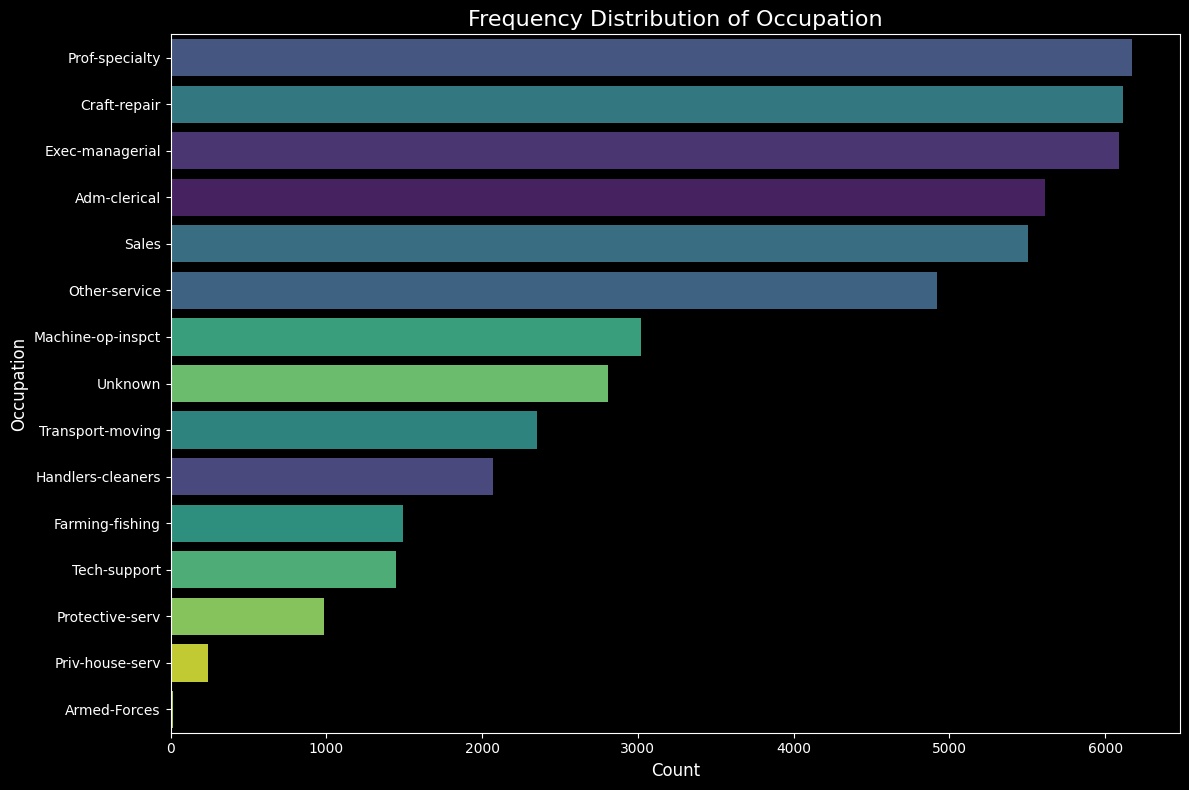

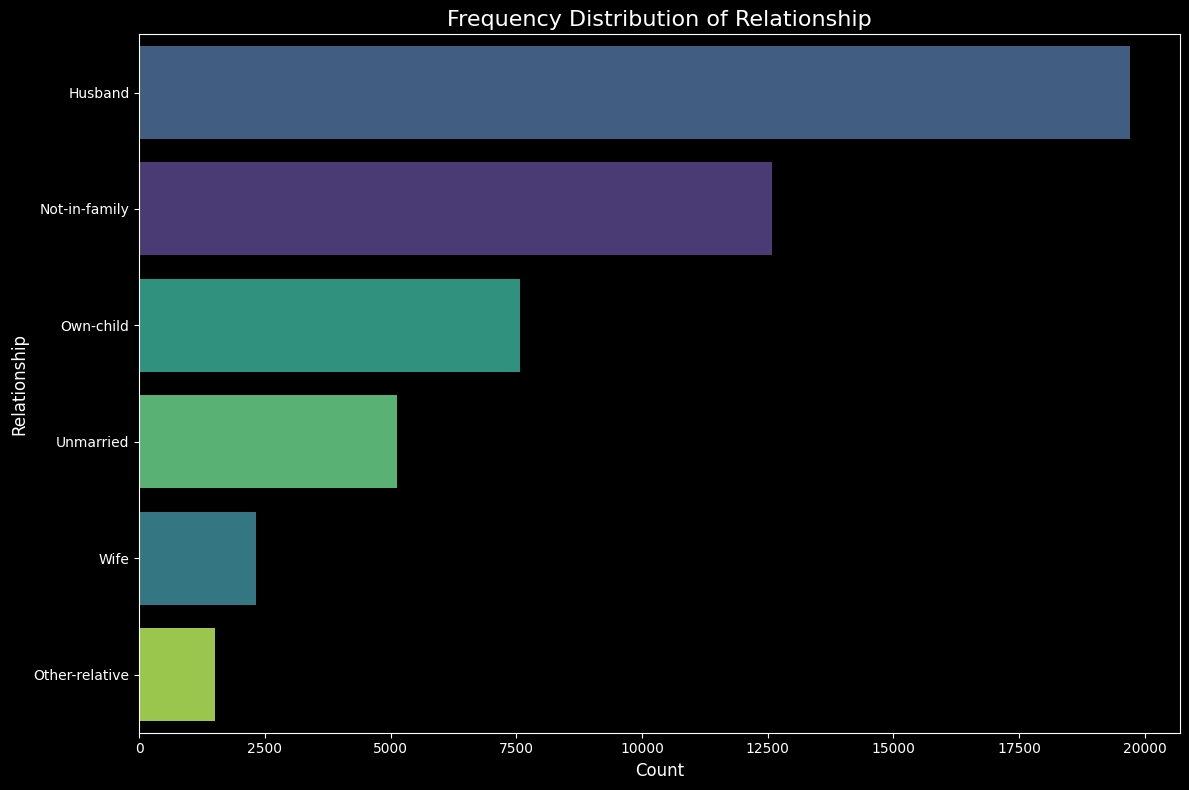

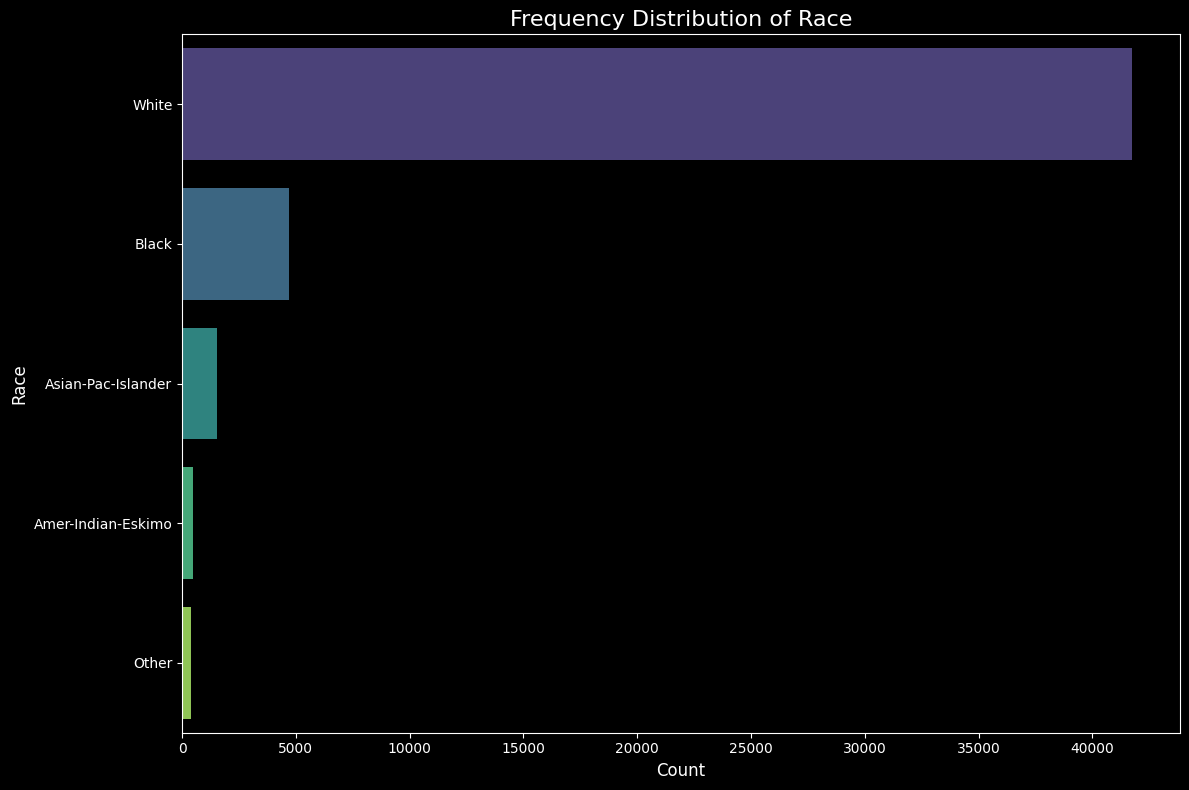

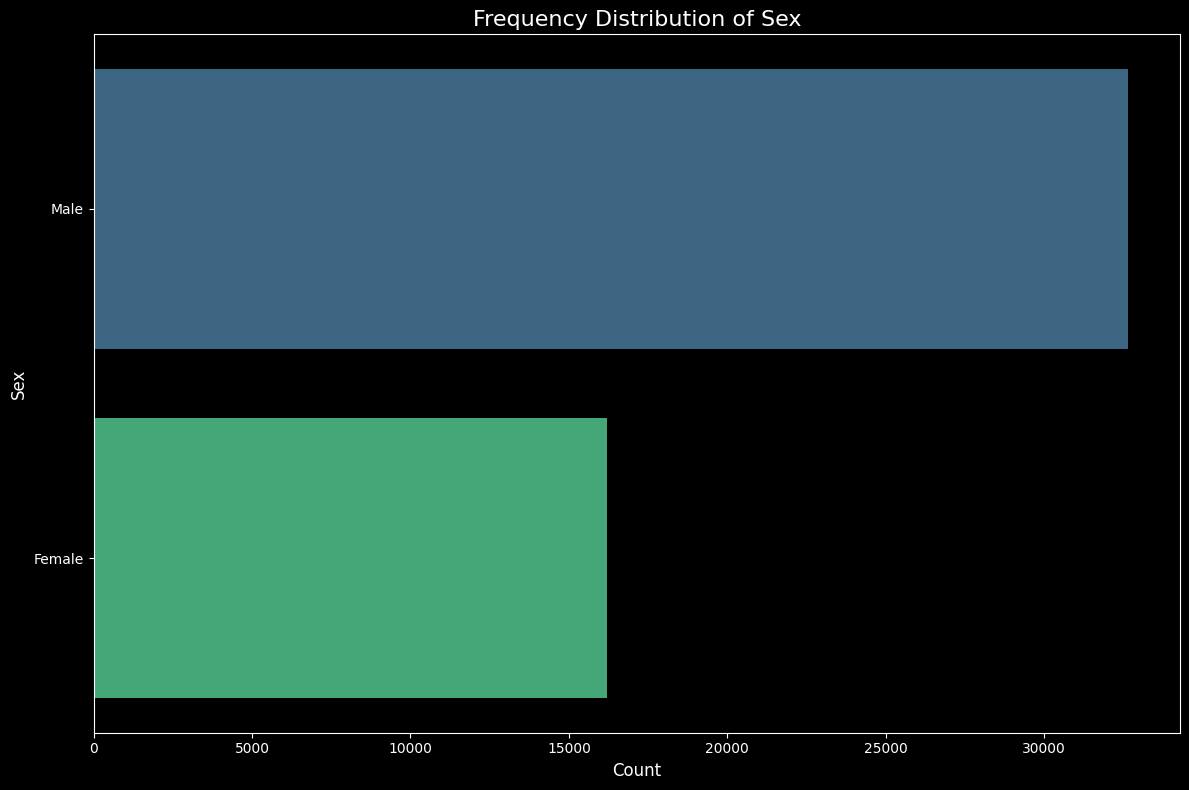

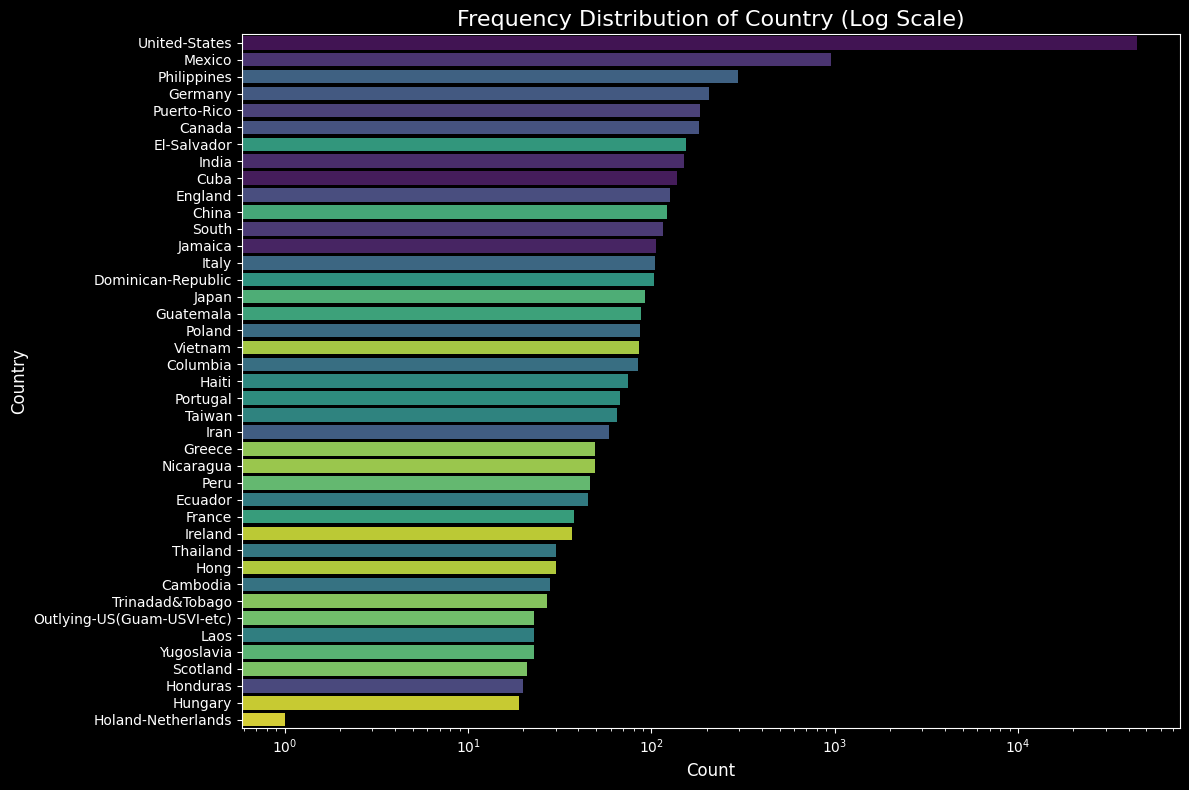

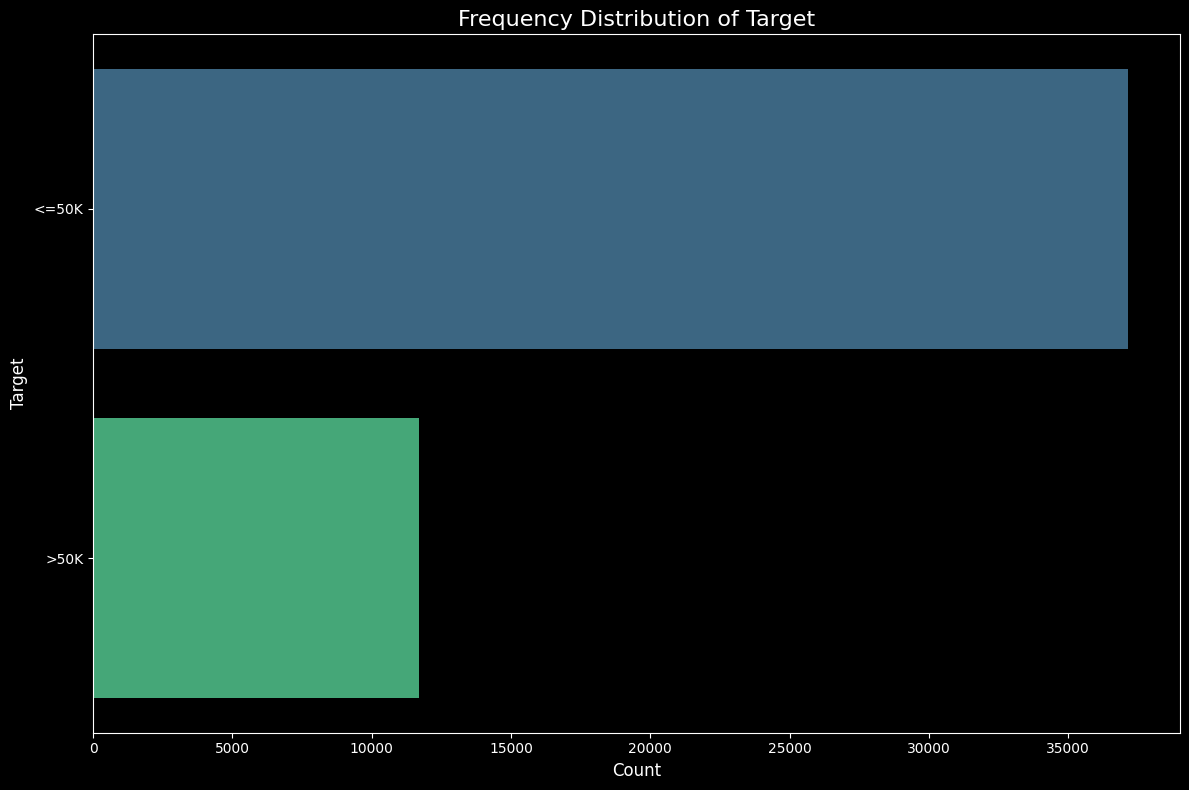


--- PART 2: BIVARIATE ANALYSIS (vs. Target) ---

Analyzing Numerical Features vs. Target...


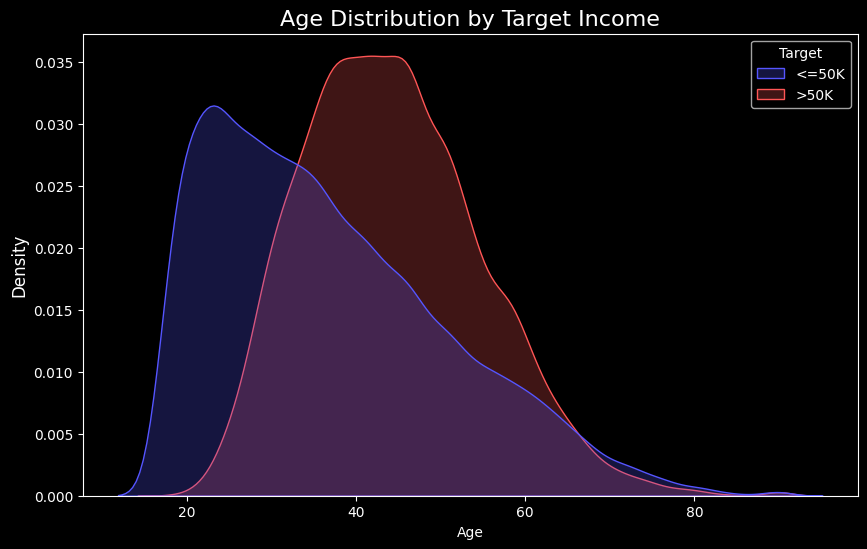

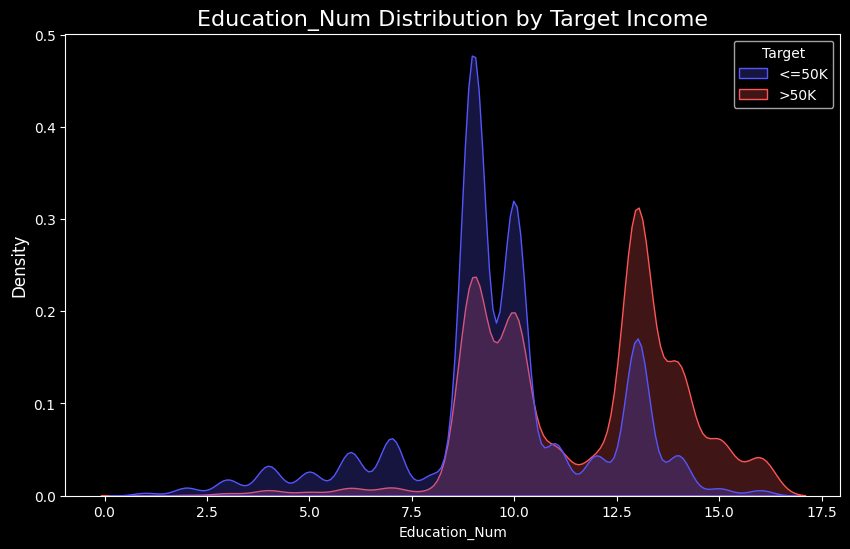

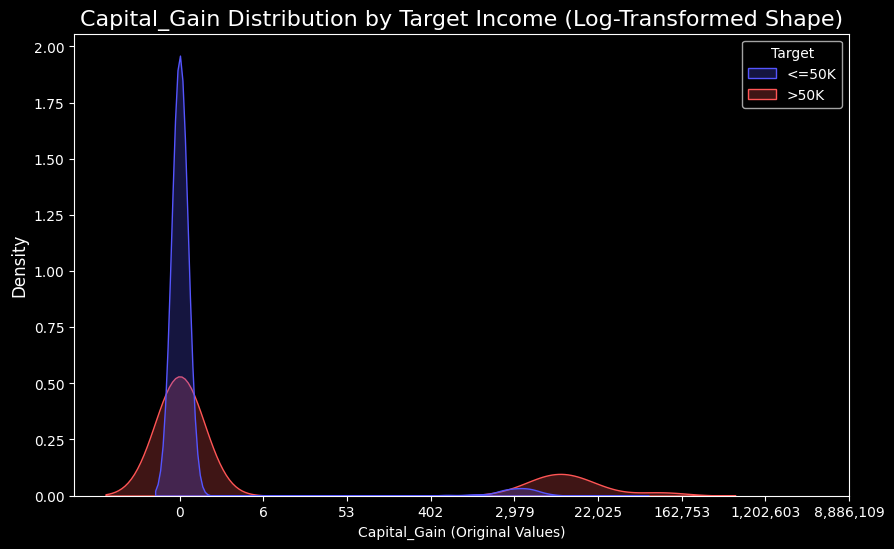

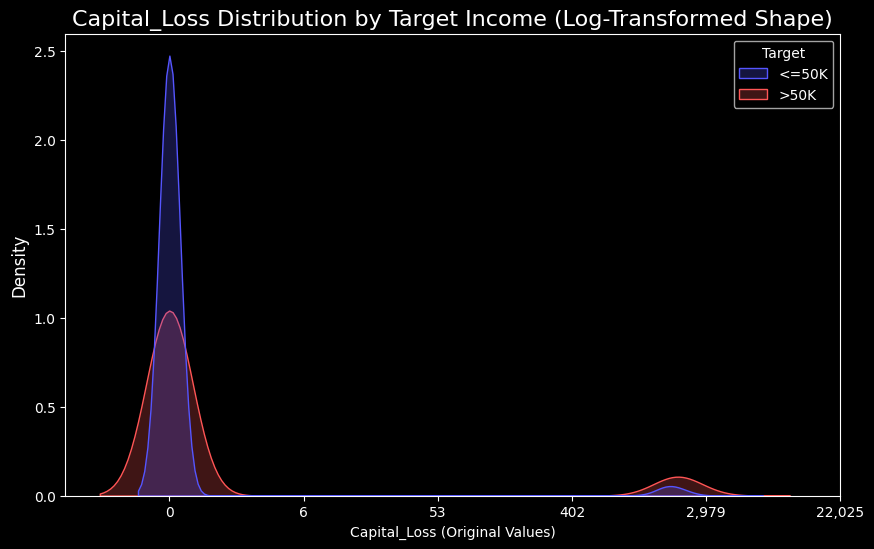

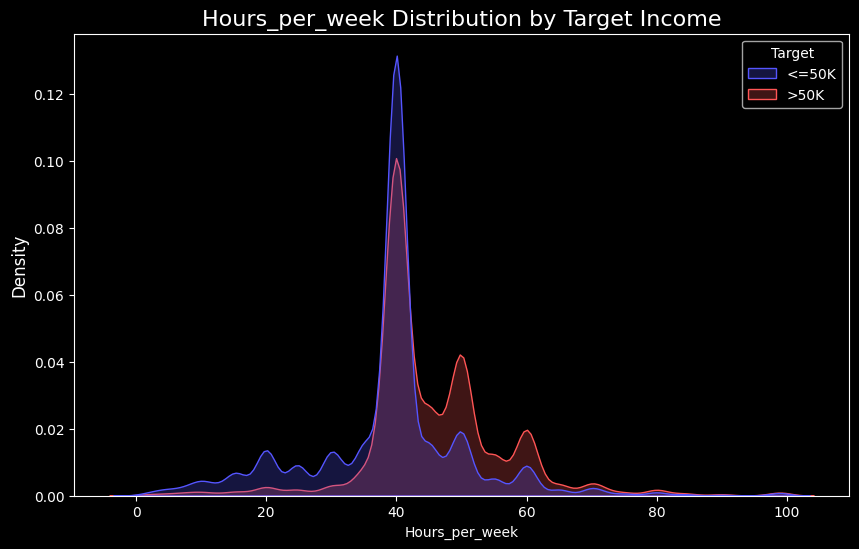


Analyzing Categorical Features vs. Target...


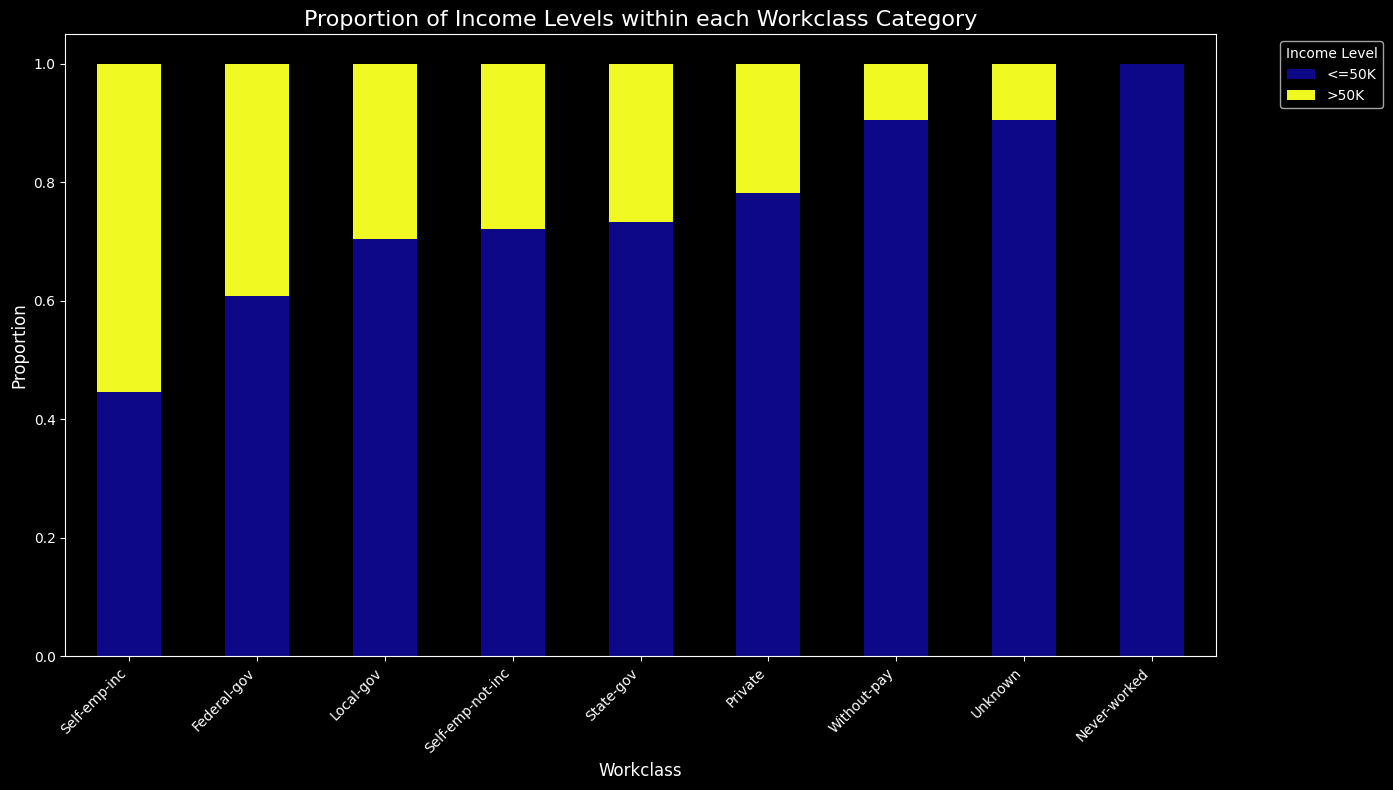

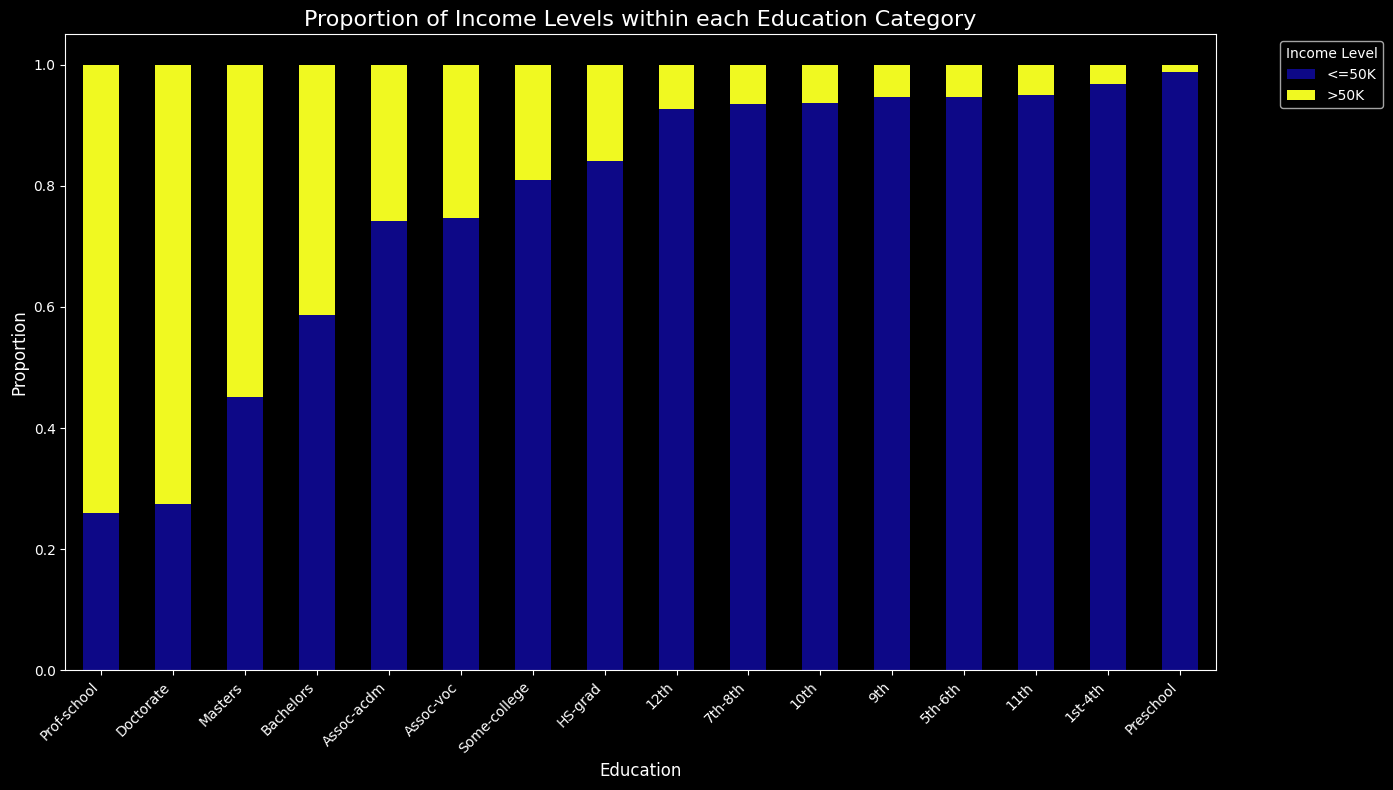

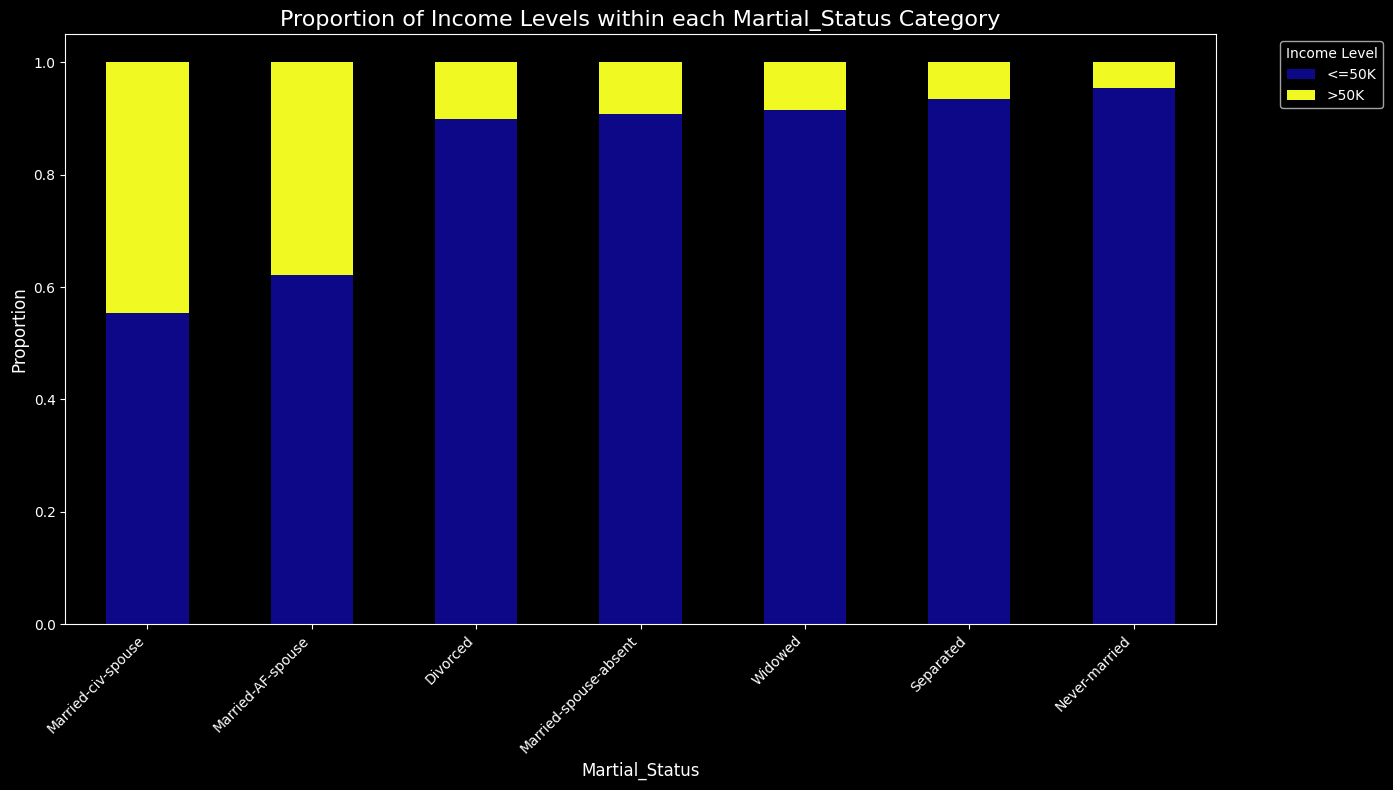

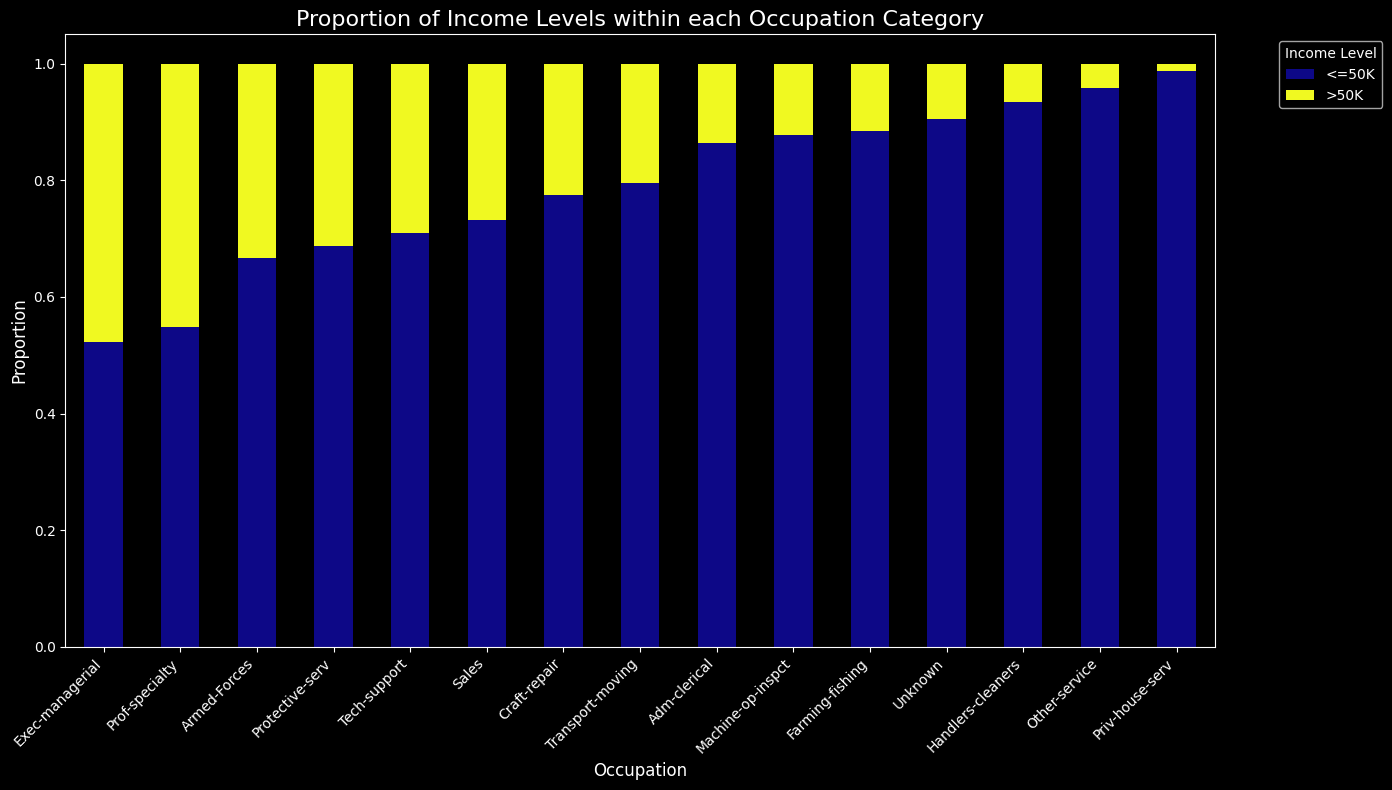

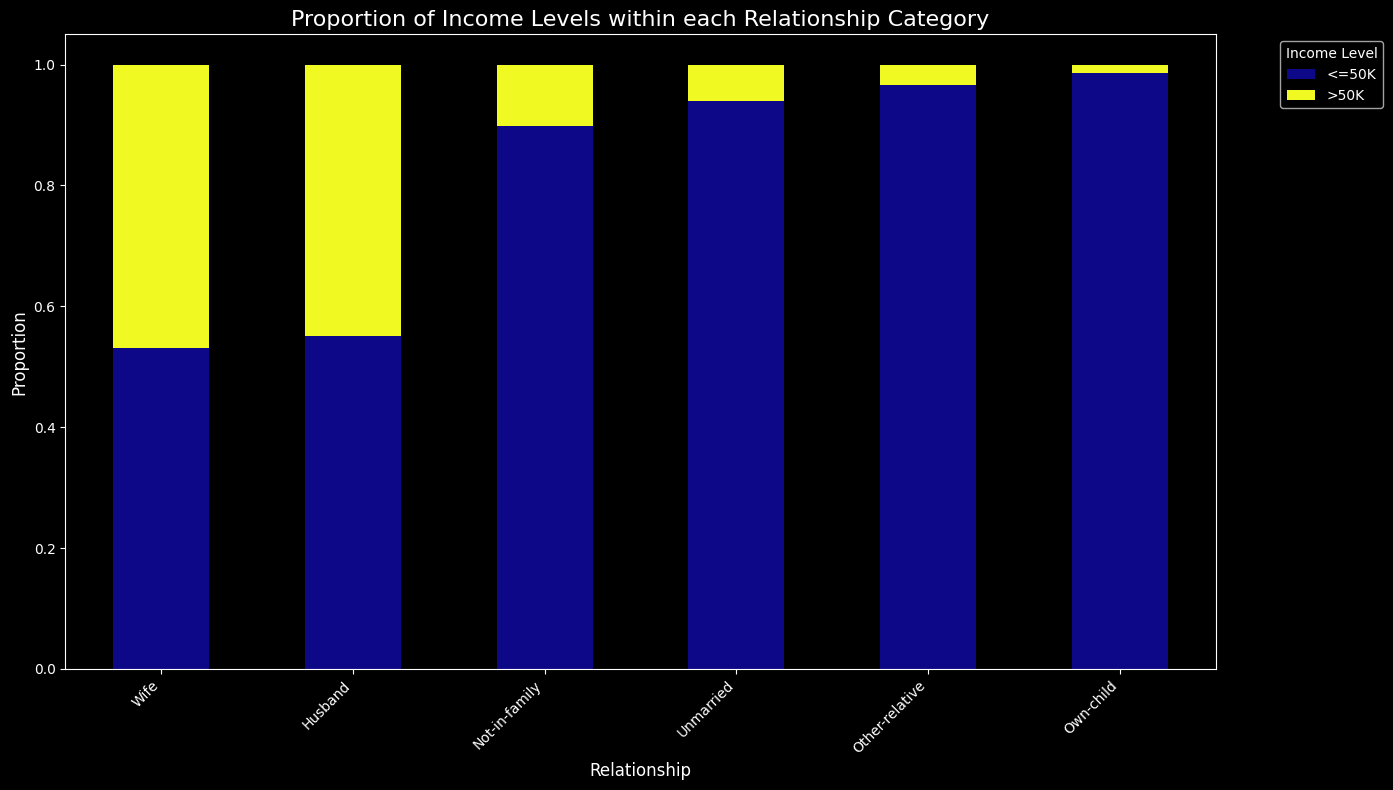

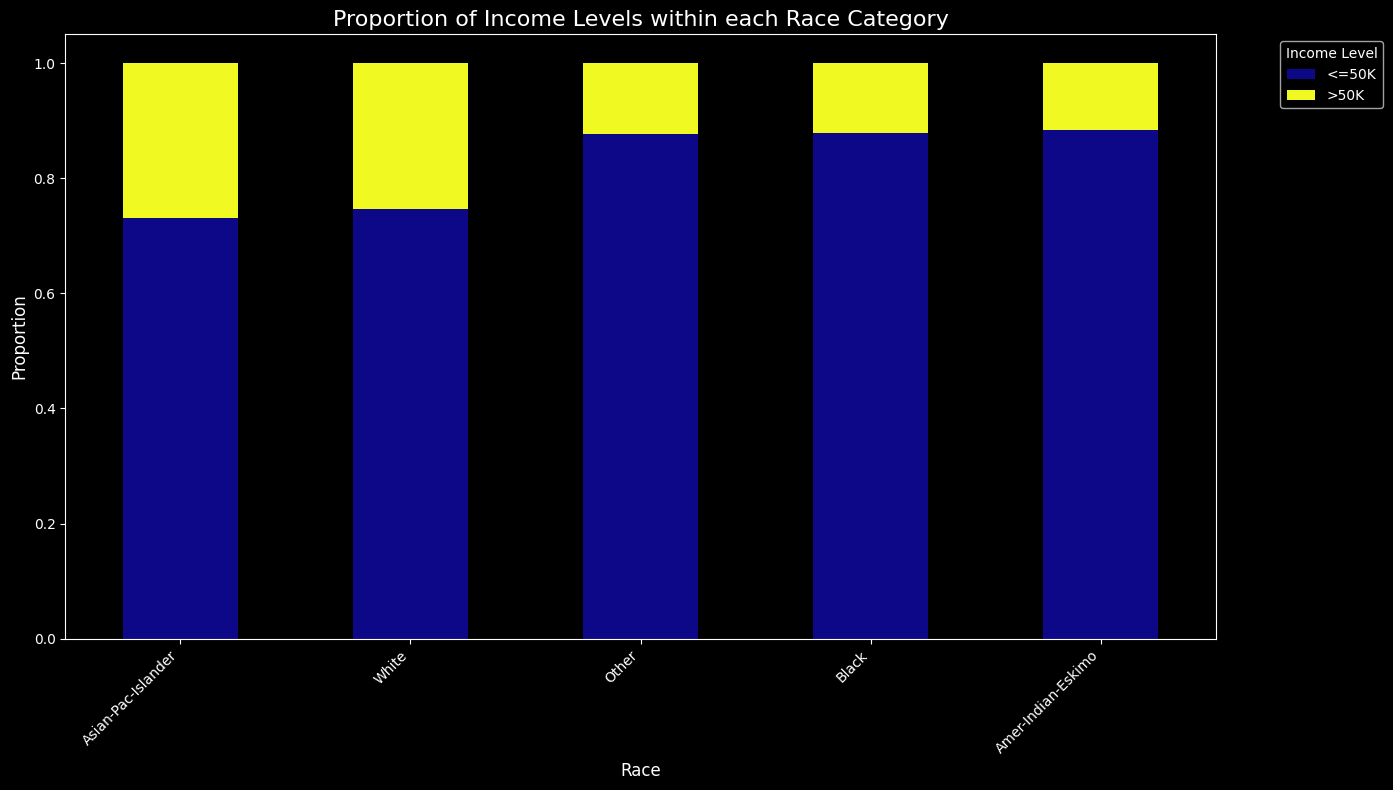

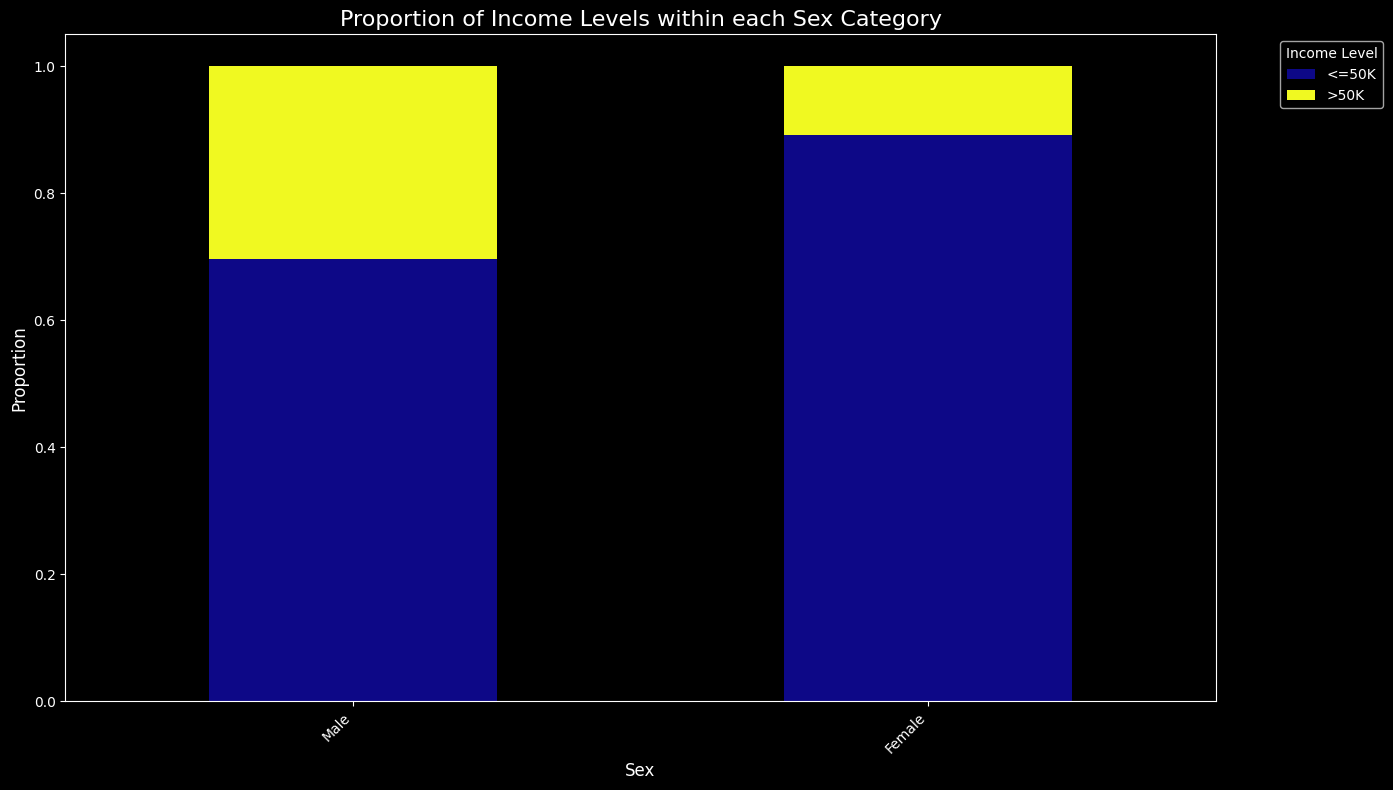

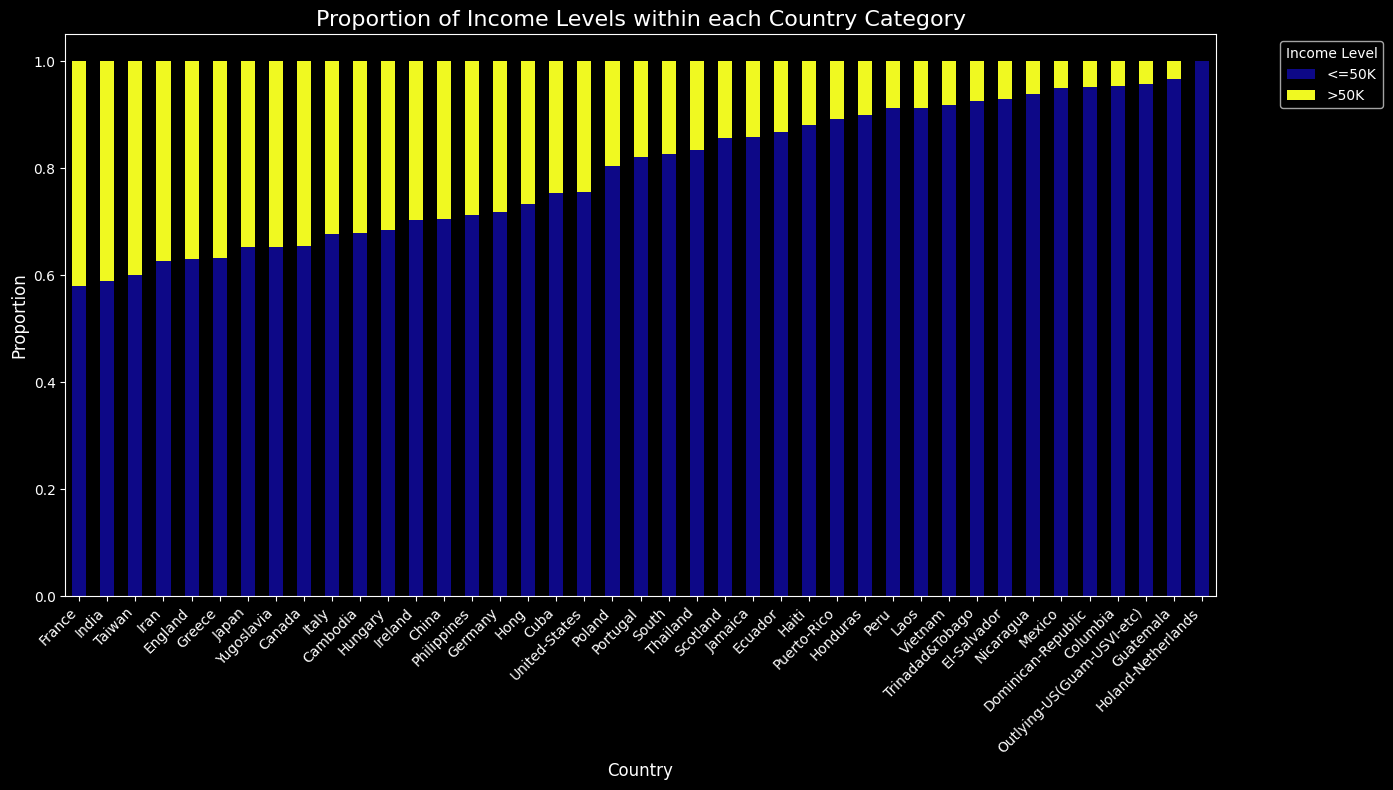


--- PART 3: MULTIVARIATE ANALYSIS ---

Analyzing Correlation Matrix of Numerical Features...


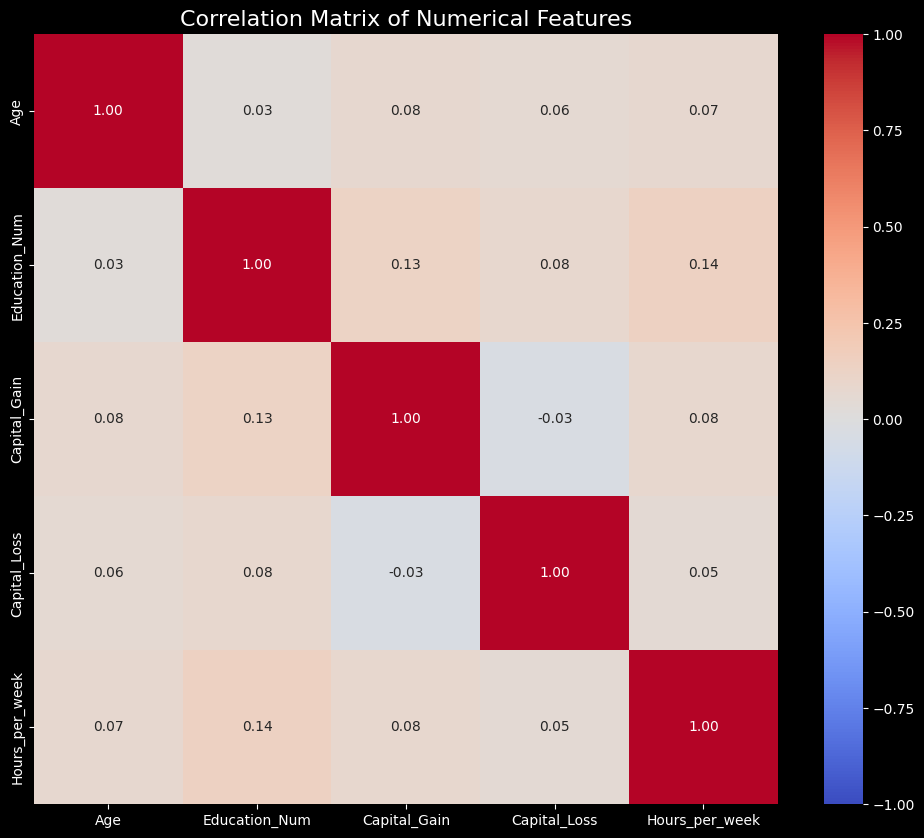


Generating Pair Plot for Key Features...


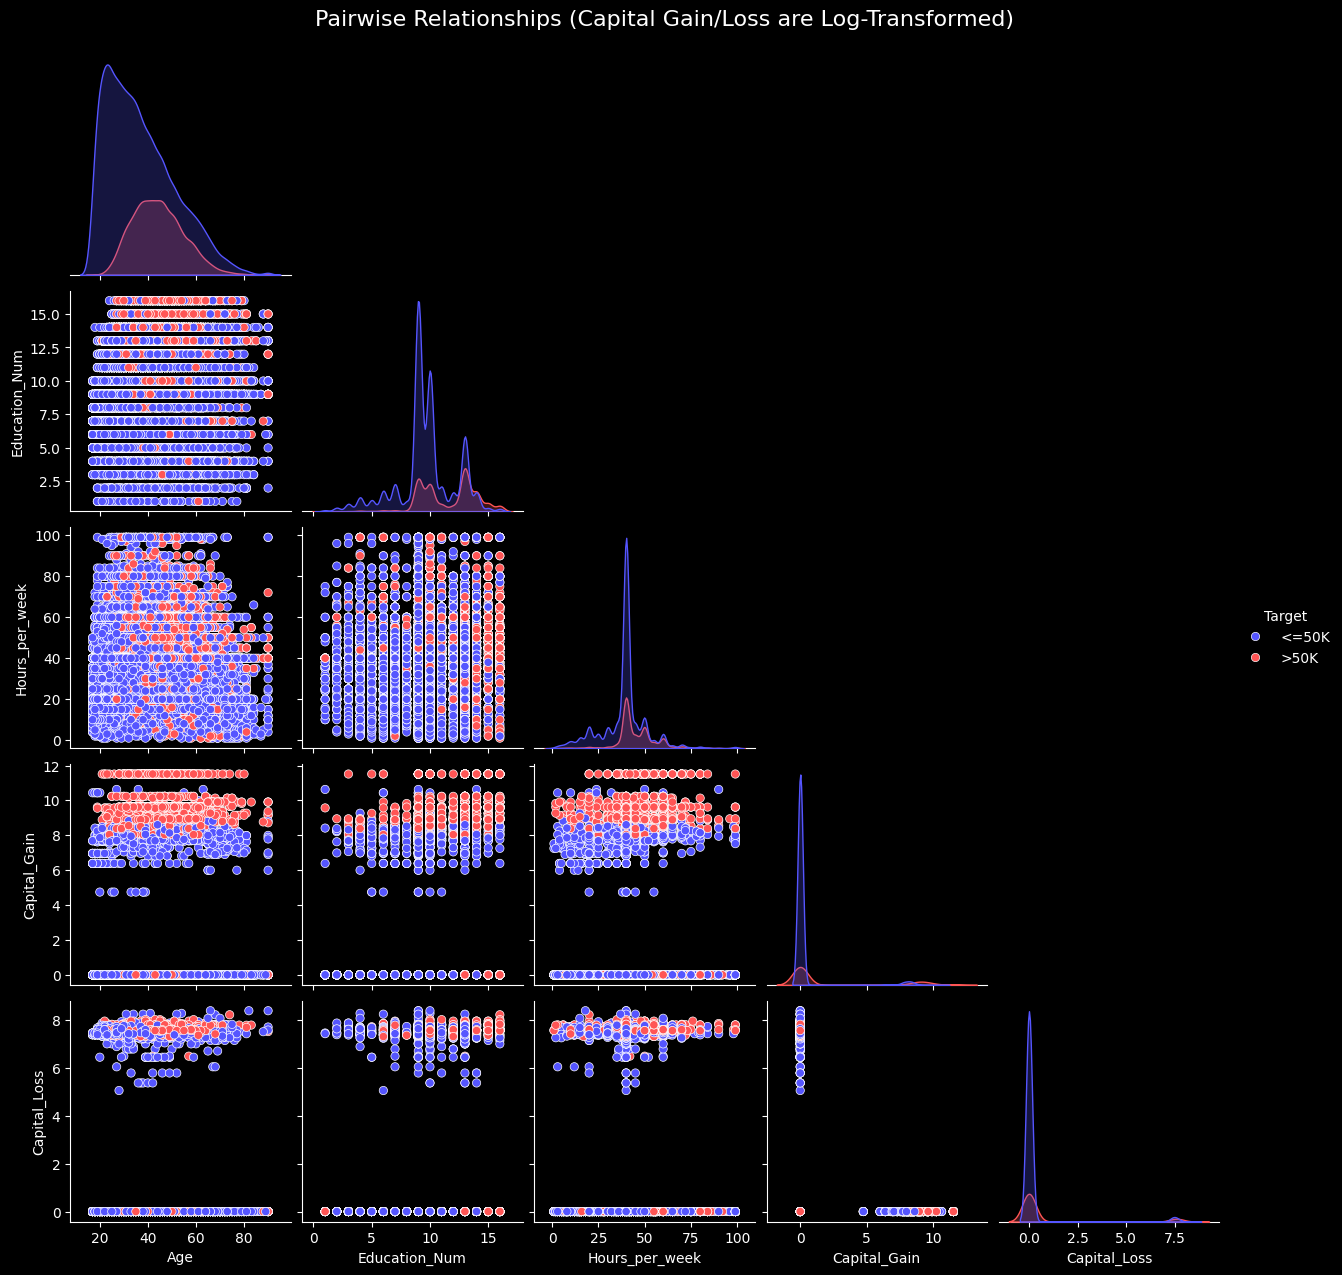

In [66]:
print("Starting Structured EDA...")

numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(
    include=['object', 'category']).columns.tolist()

print("\n--- PART 1: UNIVARIATE ANALYSIS ---")

# --- 1a. Numerical Feature Distributions ---
print("\nAnalyzing Numerical Feature Distributions...")
for col in numerical_cols:
    plt.figure(figsize=(14, 5))

    is_skewed = col in ['Capital_Gain', 'Capital_Loss']

    if is_skewed:
        non_zero_data = df[df[col] > 0][col]
        zero_percentage = (1 - (len(non_zero_data) / len(df))) * 100

        # --- Left Plot: Histogram of ONLY Non-Zero Values (Log Scale) ---
        ax1 = plt.subplot(1, 2, 1)
        if not non_zero_data.empty:
            sns.histplot(non_zero_data, kde=True, bins=40, log_scale=True, ax=ax1)
            plt.title(f'Distribution of Non-Zero {col}', fontsize=14)
            plt.xlabel(f'{col} (Log Scale, Original Values)')
        else:
            plt.title(f'No Non-Zero Values for {col}', fontsize=14)

        # --- Right Plot: Box Plot of ONLY Non-Zero Values (Log Scale) ---
        ax2 = plt.subplot(1, 2, 2)
        if not non_zero_data.empty:
            sns.boxplot(x=non_zero_data, ax=ax2)
            plt.xscale('log')
            plt.title(f'Box Plot of Non-Zero {col}', fontsize=14)
            plt.xlabel(f'{col} (Log Scale, Original Values)')
        else:
            plt.title(f'No Non-Zero Values for {col}', fontsize=14)

        if not non_zero_data.empty:
            stats = non_zero_data.describe()
            stat_ticks = [stats['min'], stats['25%'], stats['50%'], stats['75%'], stats['max']]
            # Ensure ticks are unique to avoid errors
            stat_ticks = sorted(list(set(stat_ticks))) 

            for ax in [ax1, ax2]:
                ax.set_xticks(stat_ticks)
                ax.set_xticklabels([f'{int(t)}' for t in stat_ticks], rotation=90, ha='right')

        plt.suptitle(
            f'Analysis of {col} ({zero_percentage:.1f}% of values are zero)', fontsize=16, y=1.02)

    else:
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, bins=40)
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel(col)

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col}', fontsize=14)

        plt.suptitle(f'Univariate Analysis of {col}', fontsize=16, y=1.02)

    plt.tight_layout()
    plt.show()

# --- 1b. Categorical Feature Distributions ---
print("\nAnalyzing Categorical Feature Distributions...")
for col in categorical_cols:
    plt.figure(figsize=(12, 8))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis', hue=col, legend=False)

    if col == 'Country':
        plt.xscale('log')
        plt.title(f'Frequency Distribution of {col} (Log Scale)', fontsize=16)
    else:
        plt.title(f'Frequency Distribution of {col}', fontsize=16)

    plt.xlabel('Count', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

print("\n--- PART 2: BIVARIATE ANALYSIS (vs. Target) ---")

# --- 2a. Numerical Features vs. Target ---
print("\nAnalyzing Numerical Features vs. Target...")
for col in numerical_cols:
    plt.figure(figsize=(10, 6))

    if col in ['Capital_Gain', 'Capital_Loss']:
        plot_df = pd.DataFrame({
            'Target': df['Target'],
            col: np.log1p(df[col])
        })
        ax = sns.kdeplot(data=plot_df, x=col, hue='Target', fill=True, common_norm=False, palette='seismic')
        plt.title(
            f'{col} Distribution by Target Income (Log-Transformed Shape)', fontsize=16)

        current_ticks = ax.get_xticks()
        valid_ticks = [tick for tick in current_ticks if tick >= 0]
        # Use np.expm1 to reverse np.log1p, format as integer with comma
        ax.set_xticks(valid_ticks)
        ax.set_xticklabels([f'{int(np.expm1(tick)):,}' for tick in valid_ticks])
        plt.xlabel(f'{col} (Original Values)')

    else:
        sns.kdeplot(data=df, x=col, hue='Target', fill=True,
                    common_norm=False, palette='seismic')
        plt.title(f'{col} Distribution by Target Income', fontsize=16)
        plt.xlabel(col)

    plt.ylabel('Density', fontsize=12)
    plt.show()

# --- 2b. Categorical Features vs. Target ---
print("\nAnalyzing Categorical Features vs. Target...")
for col in categorical_cols:
    if col == 'Target':
        continue

    prop_df = df.groupby(col)['Target'].value_counts(
        normalize=True).unstack().fillna(0)

    if '>50K' in prop_df.columns:
        prop_df = prop_df.sort_values(by='>50K', ascending=False)

    prop_df.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='plasma')

    plt.title(f'Proportion of Income Levels within each {col} Category', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Proportion', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Income Level', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

print("\n--- PART 3: MULTIVARIATE ANALYSIS ---")

# --- 3a. Correlation Matrix of Numerical Features ---
print("\nAnalyzing Correlation Matrix of Numerical Features...")
plt.figure(figsize=(12, 10))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()

# --- 3b. Pairwise Relationships Colored by Target ---
print("\nGenerating Pair Plot for Key Features...")
key_features = ['Age', 'Education_Num', 'Hours_per_week', 'Capital_Gain', 'Capital_Loss', 'Target']

df_pairplot = df[key_features].copy()
for col in ['Capital_Gain', 'Capital_Loss']:
    df_pairplot[col] = np.log1p(df_pairplot[col])

sns.pairplot(df_pairplot, hue='Target', palette='seismic', corner=True)
plt.suptitle('Pairwise Relationships (Capital Gain/Loss are Log-Transformed)', y=1.02, fontsize=16)
plt.show()

# Inferences

- People with <50K target tend to have lower education num, and people with >50K target tend to have higher education num. `Education`, `Occupation`, `Marital_Status`, and `Relationship` seem to be the most powerful predictors in the dataset.
- While 90% people have 0 capital gains, having any capital gain is a strong indicator of having a target >50K.